###### Machine Learning Engineer: Roaa Ibrahim
###### Classsification Problem: Health Care
###### Field: Machine Learning
###### Algorithems Applied:

 -------------------------------------

# Problem Statement:
--------------------------

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

# Objective:
------------------------

Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

# Tasks to be performed:
---------------------

###### 1.	Preliminary analysis:
 
   1.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc. ✔
   2.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy. ✔


###### 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
   1. 	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data ✔
   2.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot ✔
   3.	Study the occurrence of CVD across the Age category✔
   4.	Study the composition of all patients with respect to the Sex category✔
   5.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient✔
   6.	Describe the relationship between cholesterol levels and a target variable✔
   7.	State what relationship exists between peak exercising and the occurrence of a heart attack✔
   8.	Check if thalassemia is a major cause of CVD✔
   9.	List how the other factors determine the occurrence of CVD
   10.	Use a pair plot to understand the relationship between all the given variables
   
   
##### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection




# Steps:
----------------------
   1. Importing Libraries ✔
   2. Reading dataset ✔
   3. Understanding the dataset info, shape, unique ✔
   4. Null values ✔
   4. Skewness and distribution ✔
   5. Visualization distribution, count, box:
      - age ✔
      - sex ✔
      - trestbps ✔
      - chol ✔
      - exceg ✔
      - thal ✔
   6. Outliers
   7. training the model
   8. testing the model
   -----------------------------

## Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Preliminary analysis

## Reading the dataset

In [2]:
data = pd.read_excel(r"C:\Users\user\Desktop\Health Care2.xlsx")

## head values

In [16]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

##### observations:
   - all data seem to be numerical
   - cannot see null values
   - cannot see duplicates
   - may need feature scaling
    

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### observations:
   - no null values exist
   - all data is numerical
   - 14 columns and 303 rows
   - all columns seem to be useful

In [18]:
data.shape

(303, 14)

## Unique values

In [19]:
for col in data:
    print(col, ':', np.unique(data[col].values), '\n')

age : [29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77] 

sex : [0 1] 

cp : [0 1 2 3] 

trestbps : [ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200] 

chol : [126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 311 313 315 318 319 321 322 325 326 327 330 335 340 341 342
 353 354 360 394 407 409 417 56

##### observations:
   - sex, cp, fbs, restecg, exang, slope, ca, thal, target ..> these columns can be treated as classes

## Null values:

In [20]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### observations: 
 - No null values present

## Duplicates:

In [21]:
data.duplicated().sum()

1

In [22]:
data[data.duplicated()]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

In [3]:
data.drop_duplicates(inplace=True)

##### observations: 
 - there was one duplicate and now it is deleted.

# 2. Prepare a report about the data explaining the distribution of the disease and the related factors

## a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [24]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

##### observations:
 - target variable is balanced.

# Destribution and Skewness

In [25]:
skew = data.skew(axis =0)

In [26]:
skew

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

age -0.2037432795959691


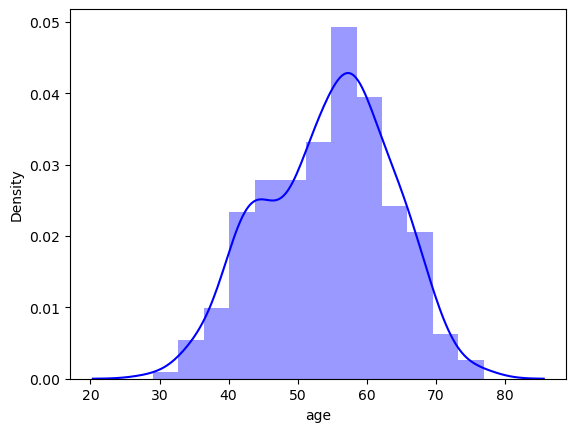

sex -0.7861201403379433


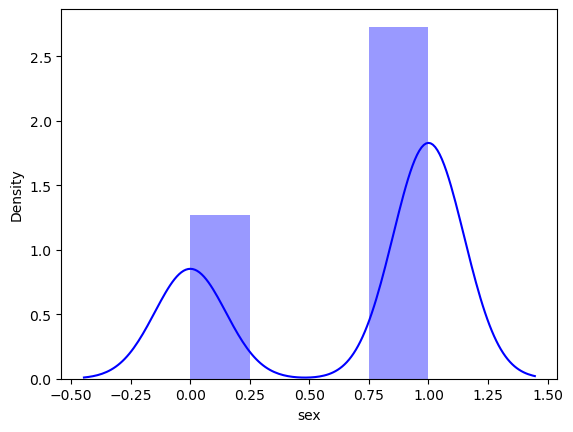

cp 0.49302157403846975


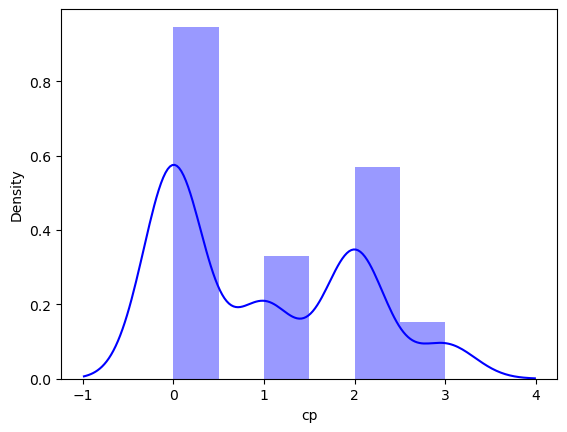

trestbps 0.7165414326647318


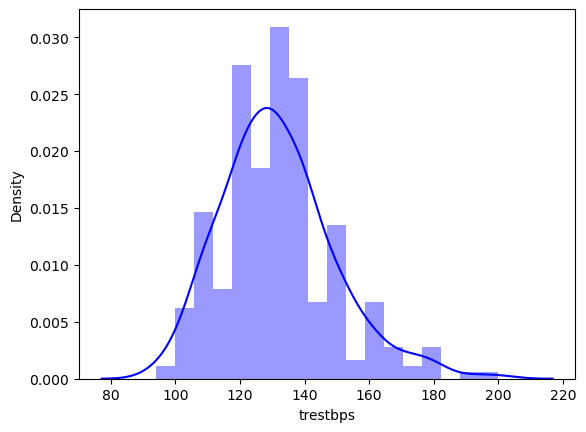

chol 1.147332413980798


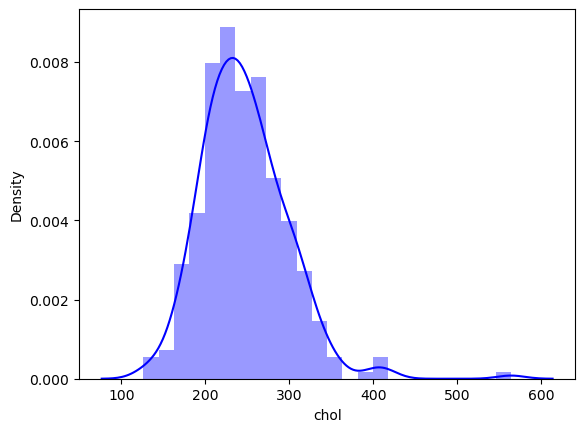

fbs 1.9812008559042782


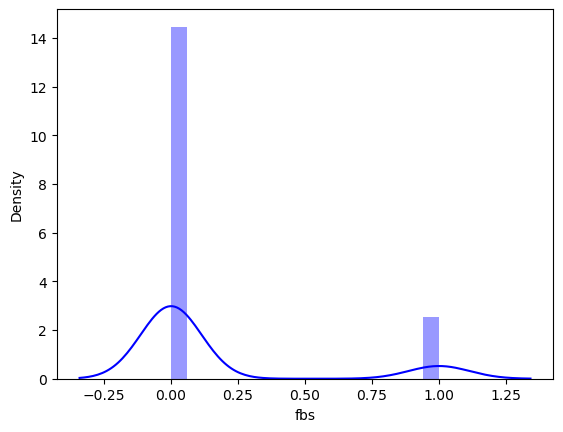

restecg 0.16946660489887697


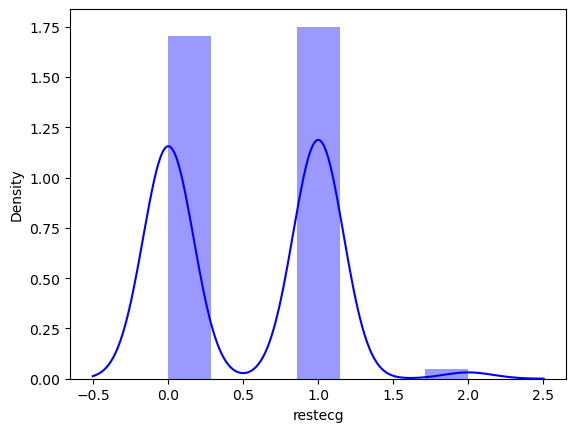

thalach -0.5326712468229611


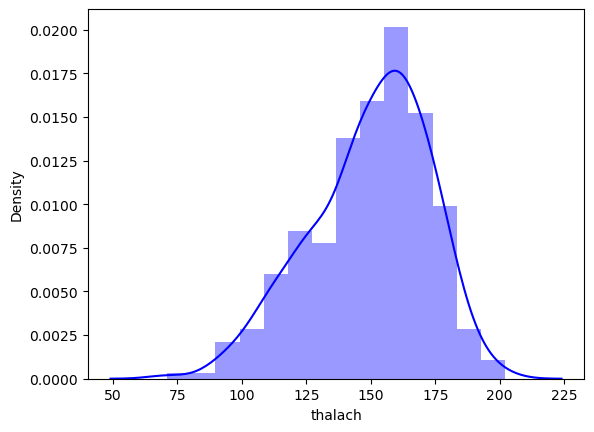

exang 0.7372812469727273


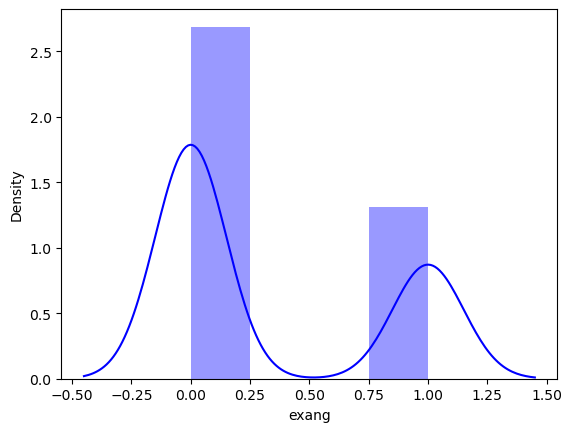

oldpeak 1.2661727209102187


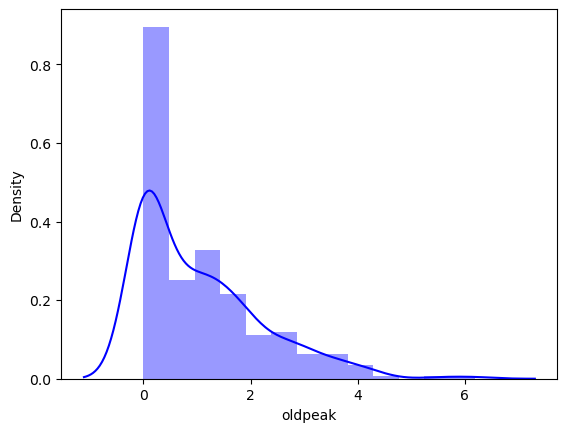

slope -0.5032467424064803


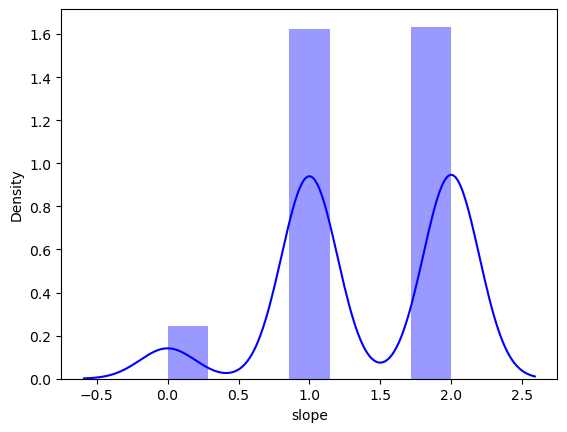

ca 1.2957384547781445


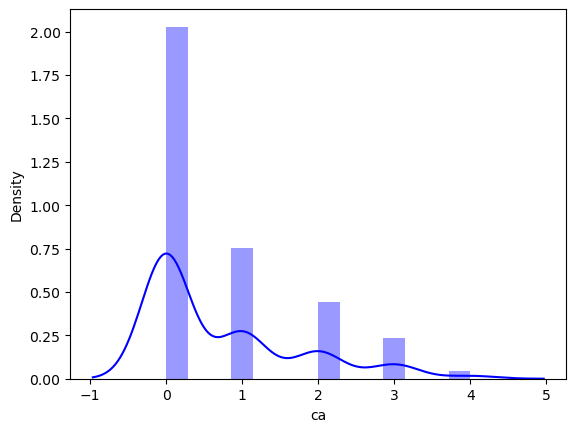

thal -0.4812324091575573


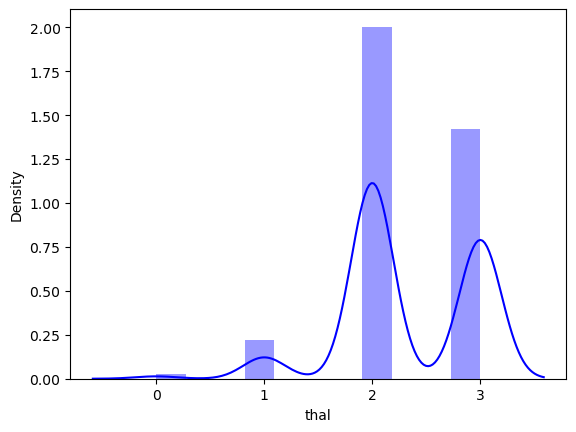

target -0.17369101189529737


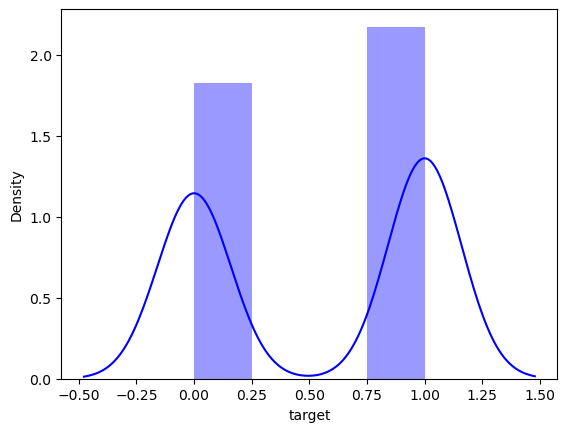

In [27]:
for col in data:
    print(col, skew[col])
    sns.distplot(data[col], color = 'blue')
    plt.show()

# Box plot

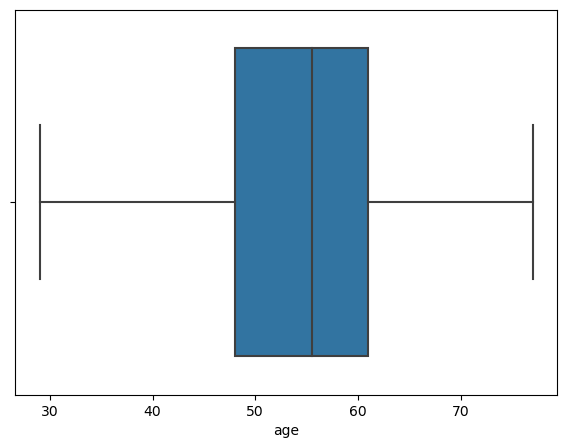

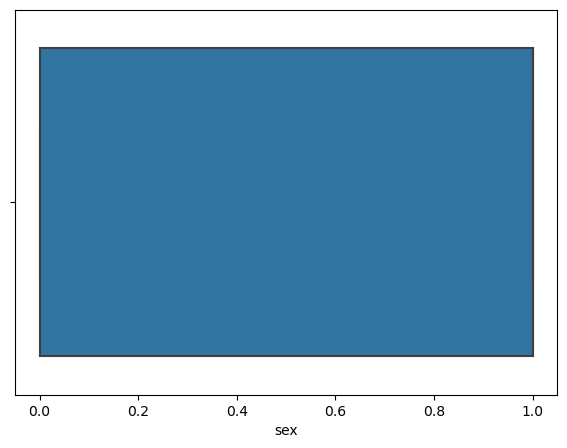

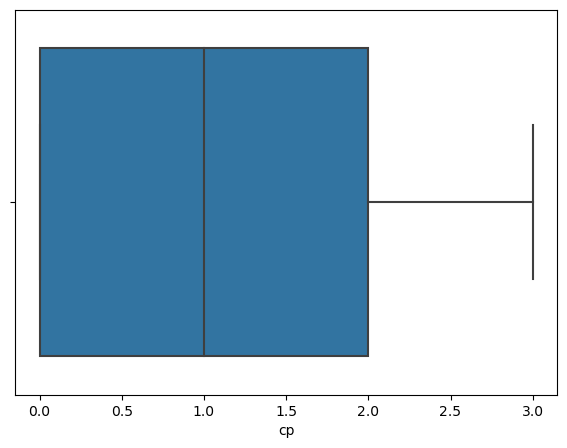

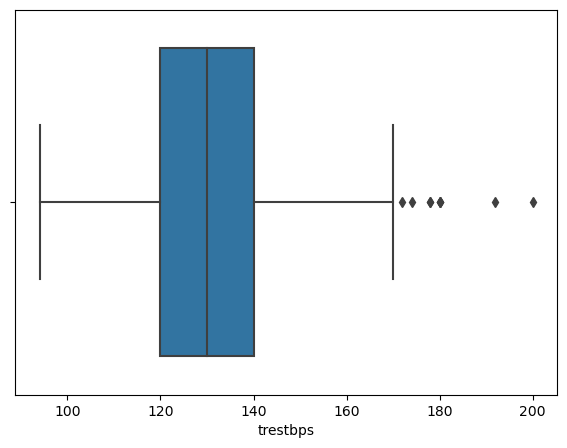

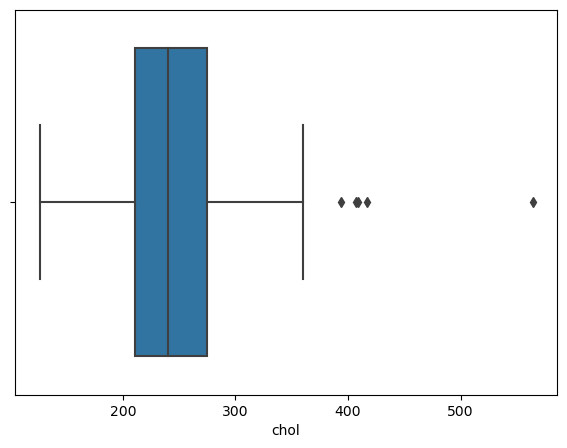

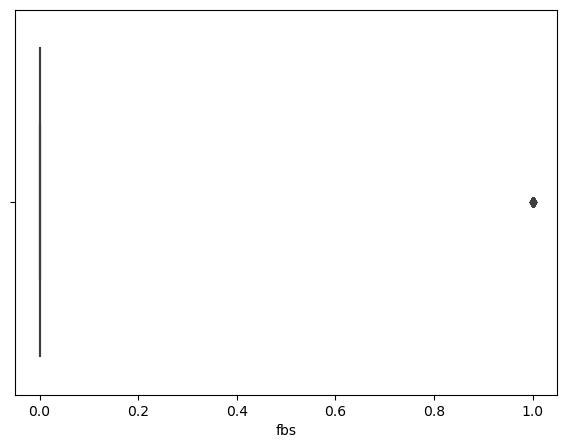

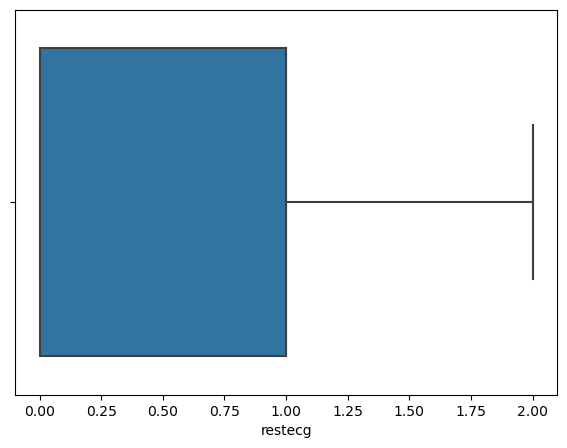

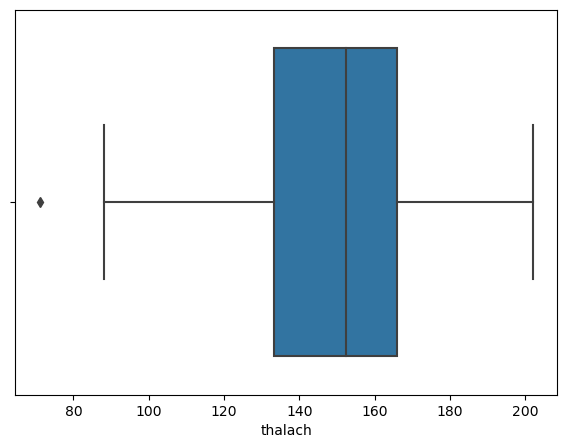

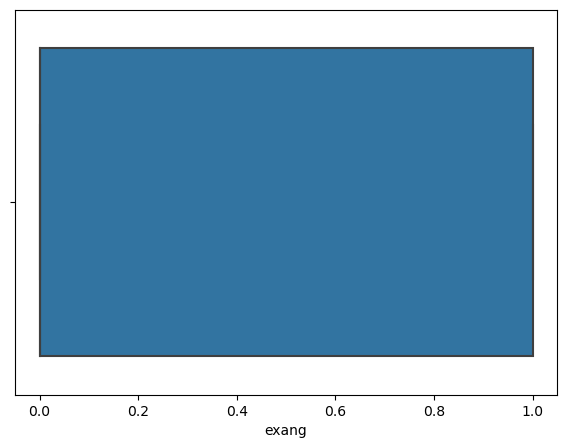

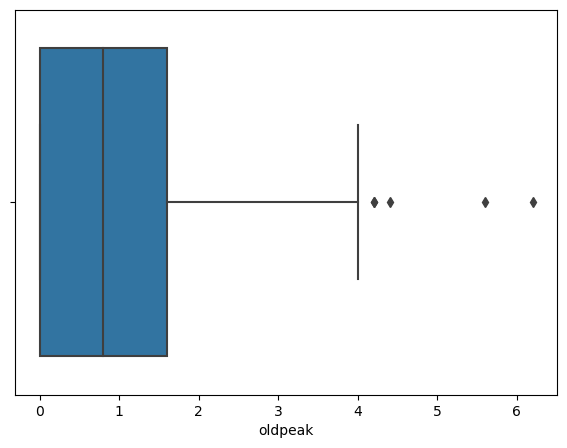

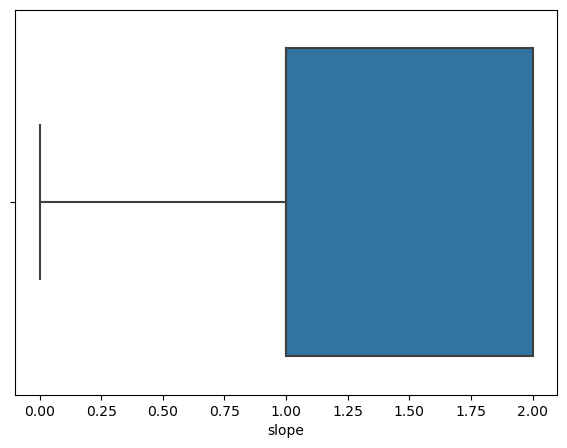

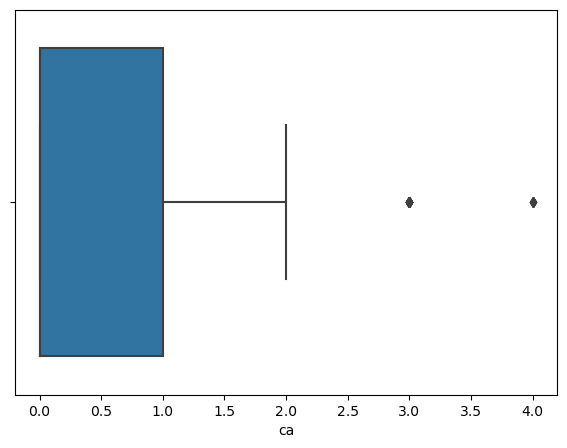

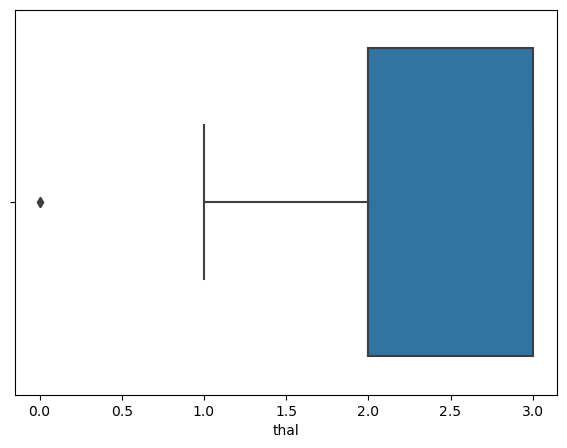

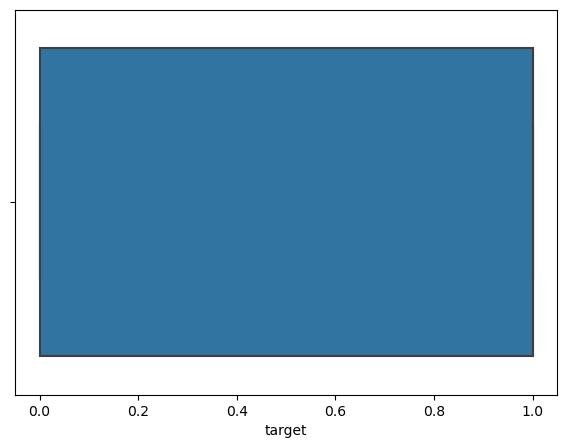

In [28]:
for col in data:
     plt.figure(figsize=(7,5))
     sns.boxplot(data[col])
     plt.show()

## 2.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

# Count plot

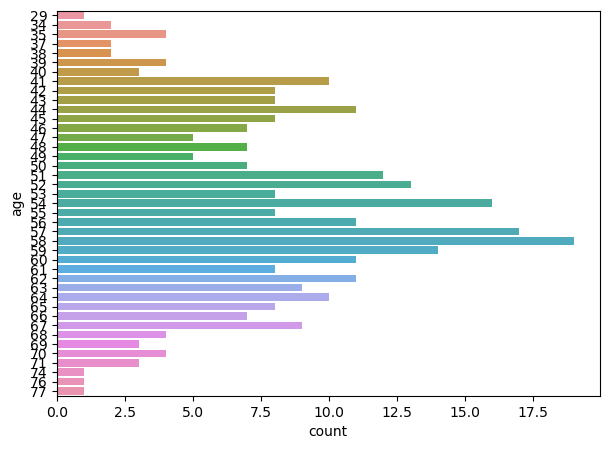

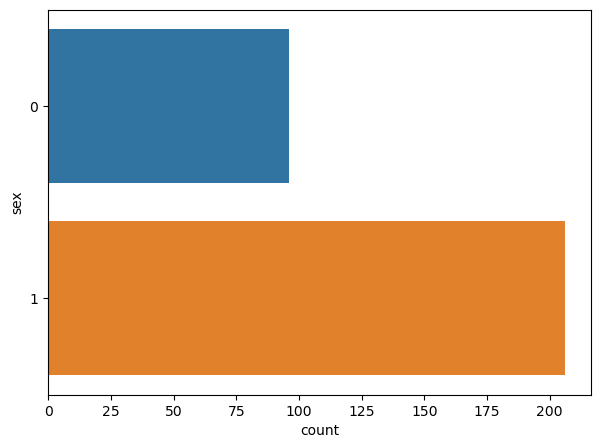

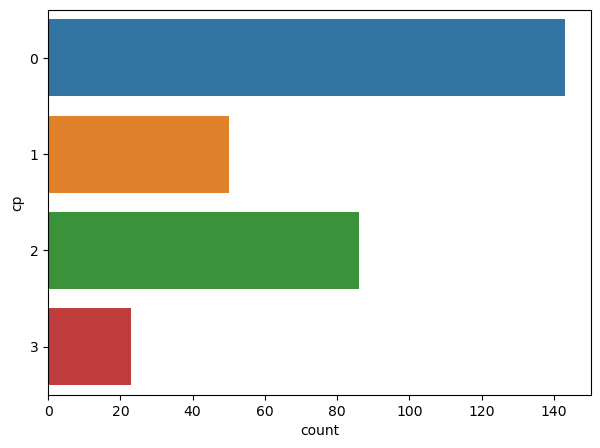

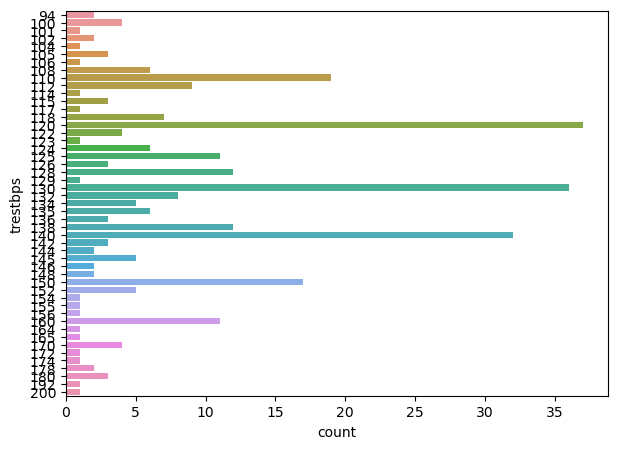

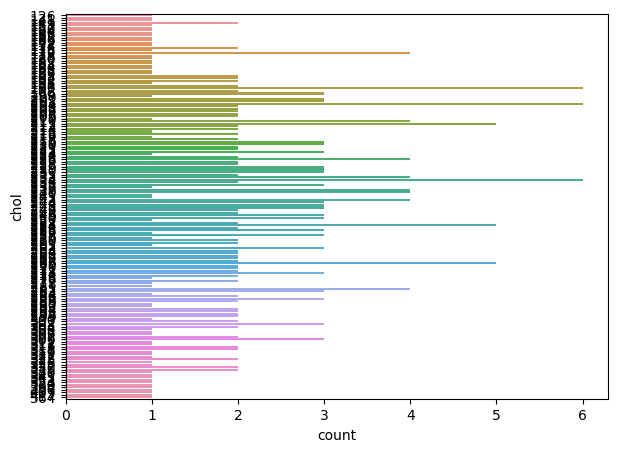

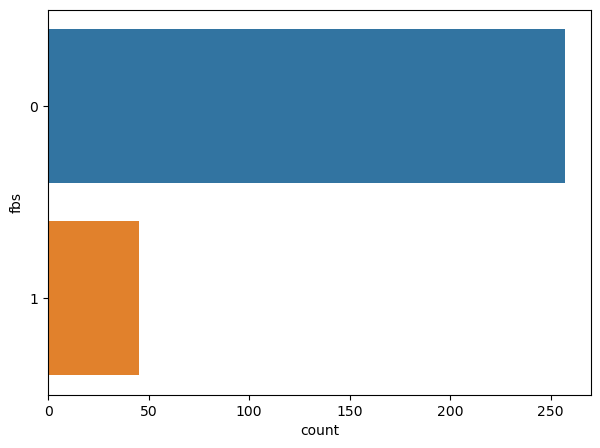

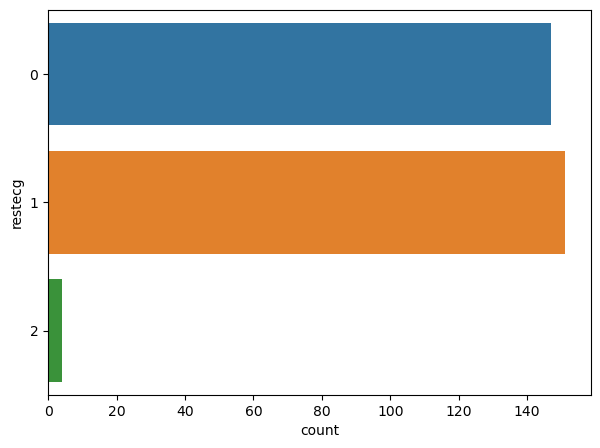

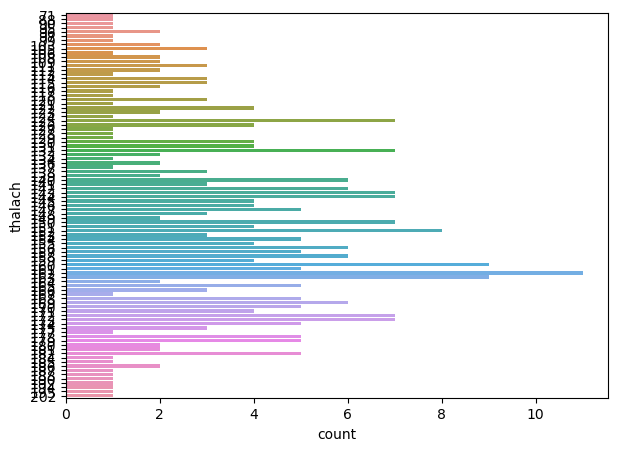

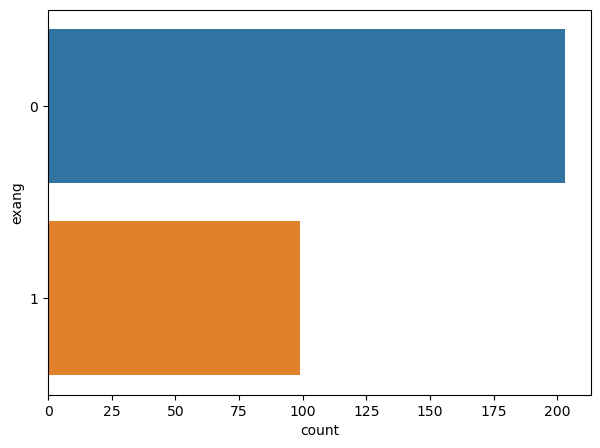

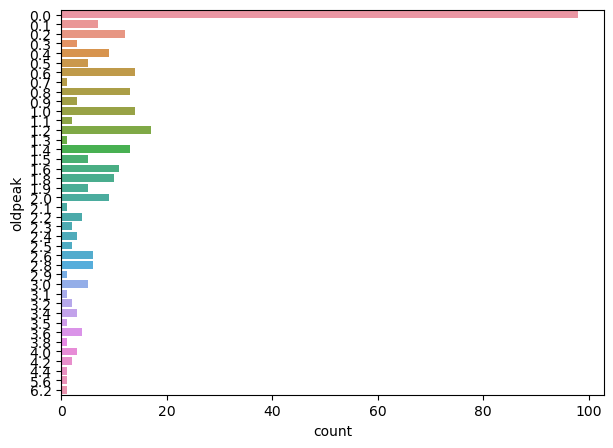

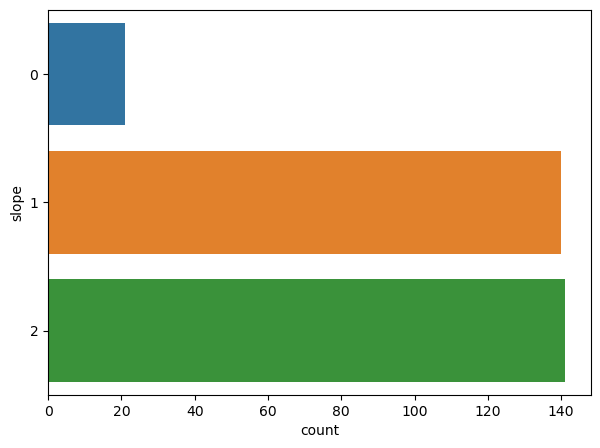

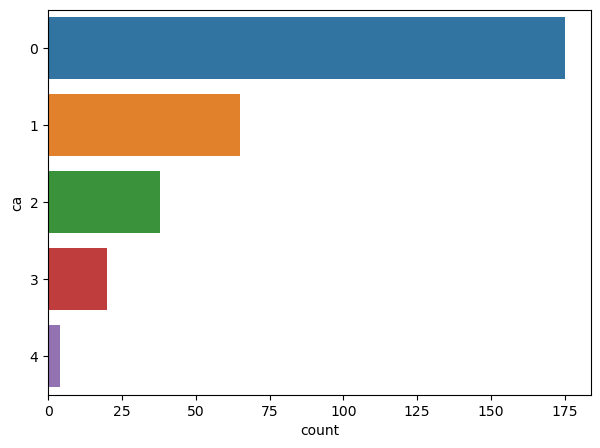

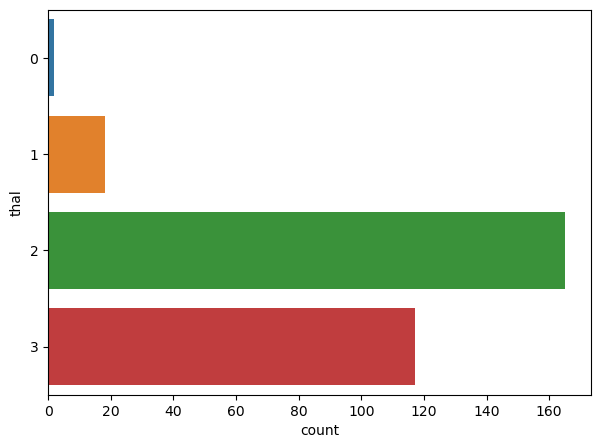

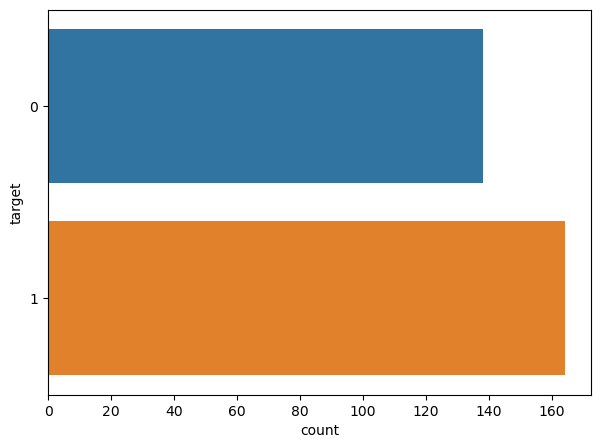

In [29]:
for col in data:
     plt.figure(figsize=(7,5))
     sns.countplot(y= data[col])
     plt.show()


## 3. Study the occurrence of CVD across the Age category

In [30]:
data['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [31]:
data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

# Hexbin Plot

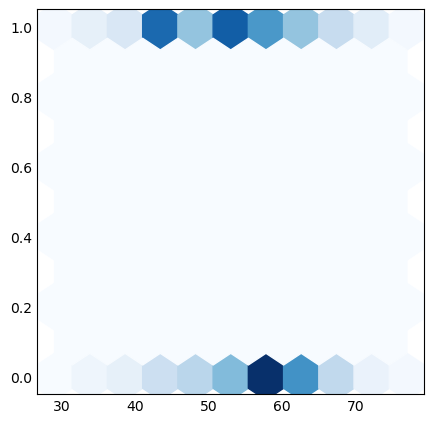

In [32]:
plt.figure(figsize = (5,5))
plt.style.use('_mpl-gallery-nogrid')
plt.hexbin(data['age'], data['target'], gridsize=10, cmap='Blues')
plt.show()

##### observations:
   - target == 1 ➡ Cardiovascular diseases occure
   - target == 0 ➡ Cardiovascular diseases does not occure
   - occurance of Cardiovascular diseases is highly observable in the age range 40-60
     - 0 ➡ 52-62 ~ 50-65
     - 1 ➡ 45-59 ~ 40-60


# Box Plot

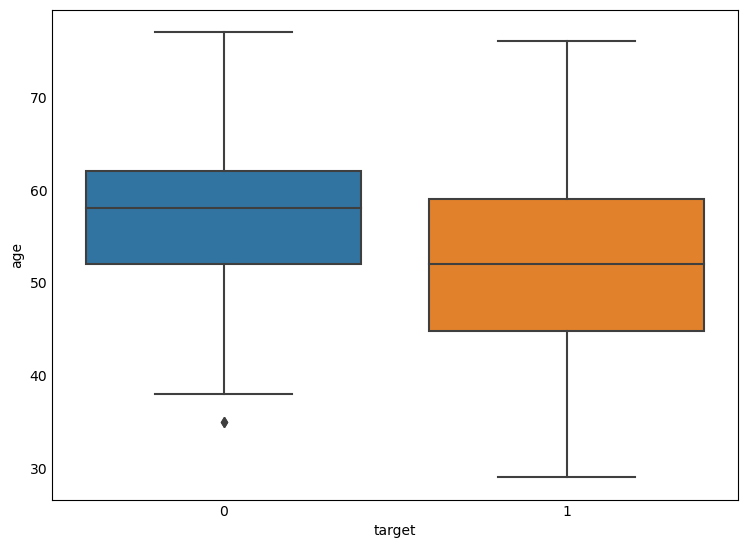

In [33]:
plt.figure(figsize=(7,5))
sns.boxplot(x=data['target'],y=data['age'])
plt.show()

# Age wise status of disease in an unstacked bar chart

In [34]:
target_age=data.groupby(['age','target']).size().unstack()

<AxesSubplot:xlabel='age'>

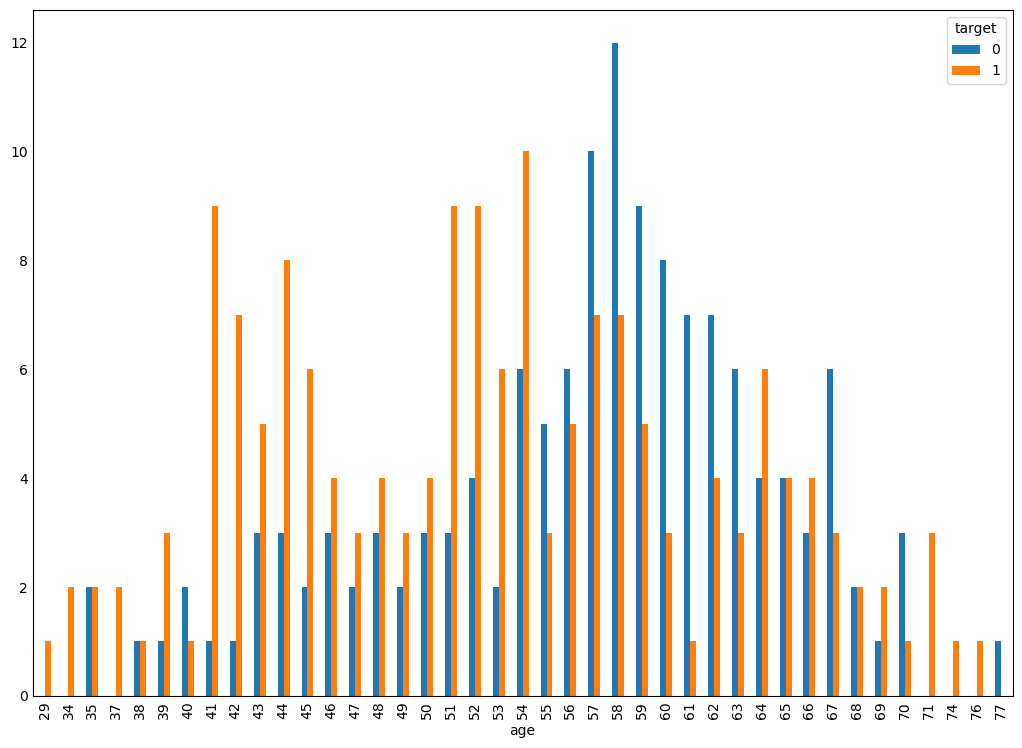

In [35]:
target_age.plot(kind="bar",stacked=False,figsize=(10,7))

#### observations:
   - from the age of 39 until 54 the most of the cases observed are diagnosed with cardiovuscular diseases..
   - from 55 and on more cases are not diagnosed with cardiovuscular diseases.

## 4. Study the composition of all patients with respect to the Sex category

In [41]:
target_sex=data.groupby(['sex','target']).size().unstack()

<AxesSubplot:xlabel='sex'>

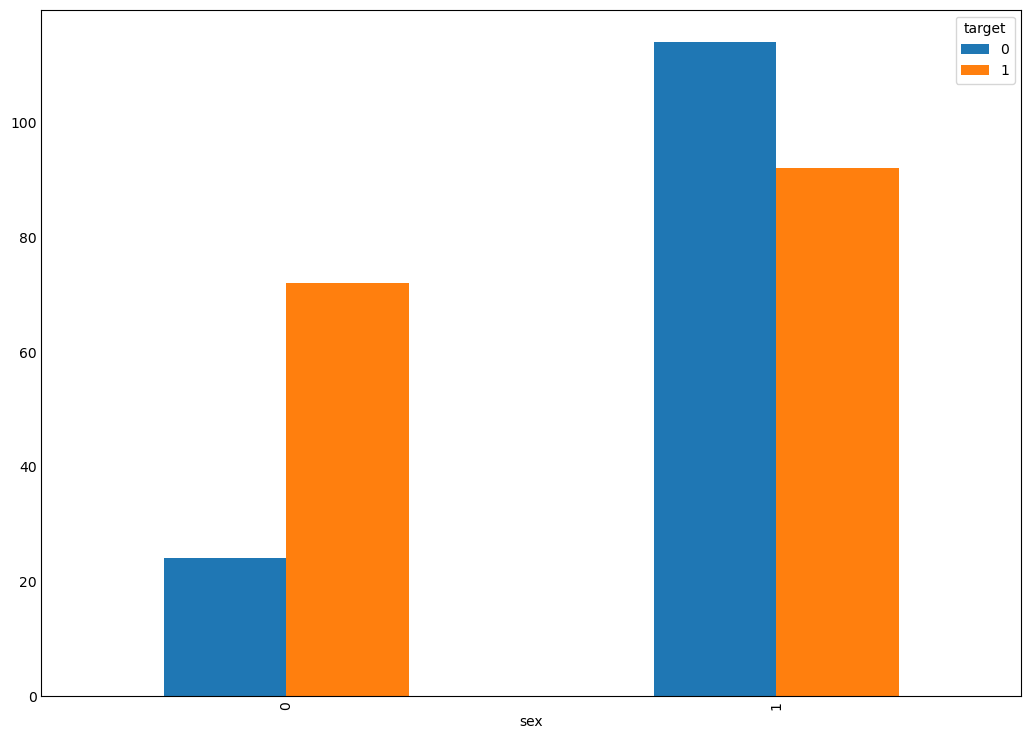

In [42]:
target_sex.plot(kind="bar",stacked=False,figsize=(10,7))

##### observations:
   - sex == 1 ➡ male
   - sex == 0 ➡ female
   - cardiovascular disease occure more among females.

## 5. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [43]:
target_trestbps=data.groupby(['trestbps','target']).size().unstack()

<AxesSubplot:xlabel='trestbps'>

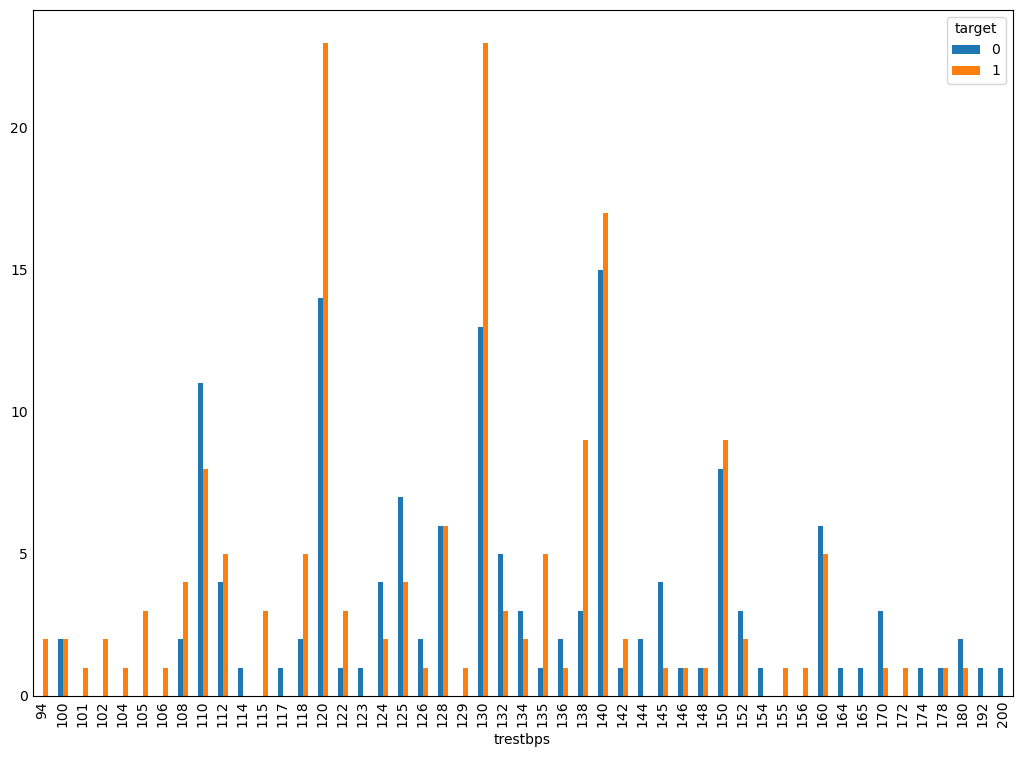

In [44]:
target_trestbps.plot(kind="bar",stacked=False,figsize=(10,7))

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

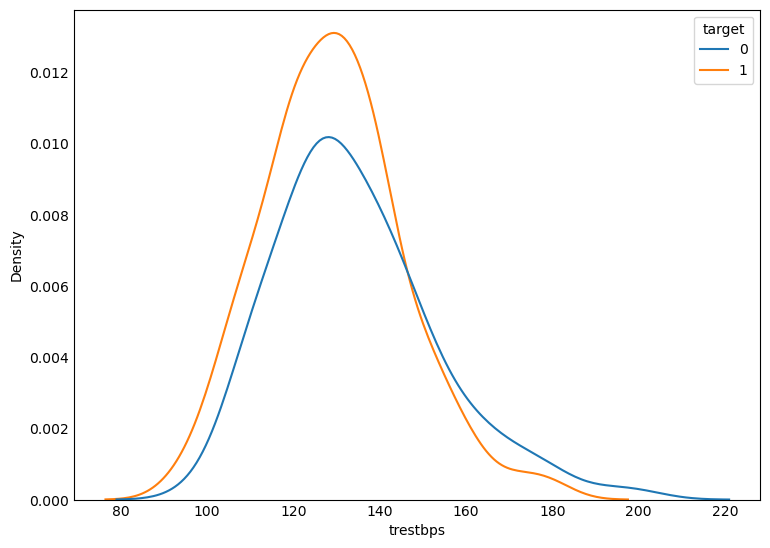

In [112]:
plt.figure(figsize = (7,5))
sns.kdeplot(data=data, x="trestbps", hue="target")

##### observations:
   - CVD occure more in anomalies in the resting blood pressure in range 120-140

## 6. Describe the relationship between cholesterol levels and a target variable

In [45]:
data['chol'].value_counts()

204    6
197    6
234    6
212    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

<AxesSubplot:xlabel='chol', ylabel='Density'>

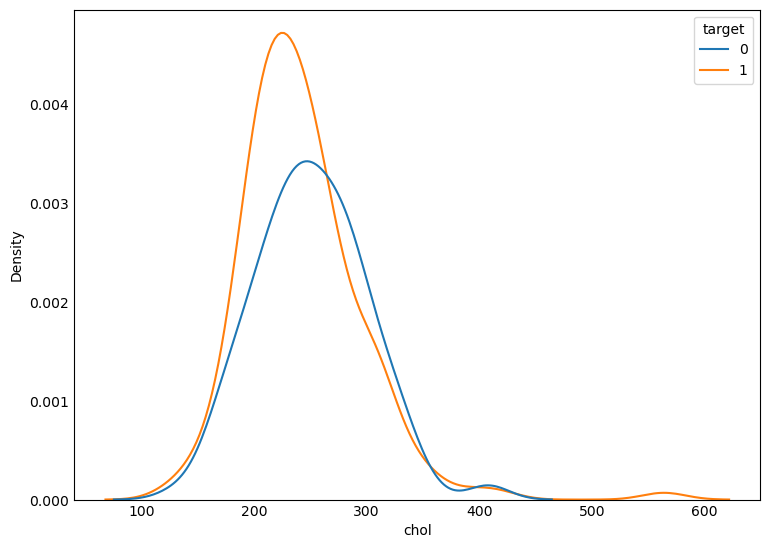

In [81]:
plt.figure(figsize = (7,5))
sns.kdeplot(data=data, x="chol", hue="target")

##### observations: 
   - more cases are diagnosed with cardiovascular disease in the cholesterol range of 180-280

## 7. State what relationship exists between peak exercising and the occurrence of a heart attack

In [83]:
data['exang'].value_counts()

0    203
1     99
Name: exang, dtype: int64

In [85]:
target_exang=data.groupby(['exang','target']).size().unstack()

<AxesSubplot:xlabel='exang'>

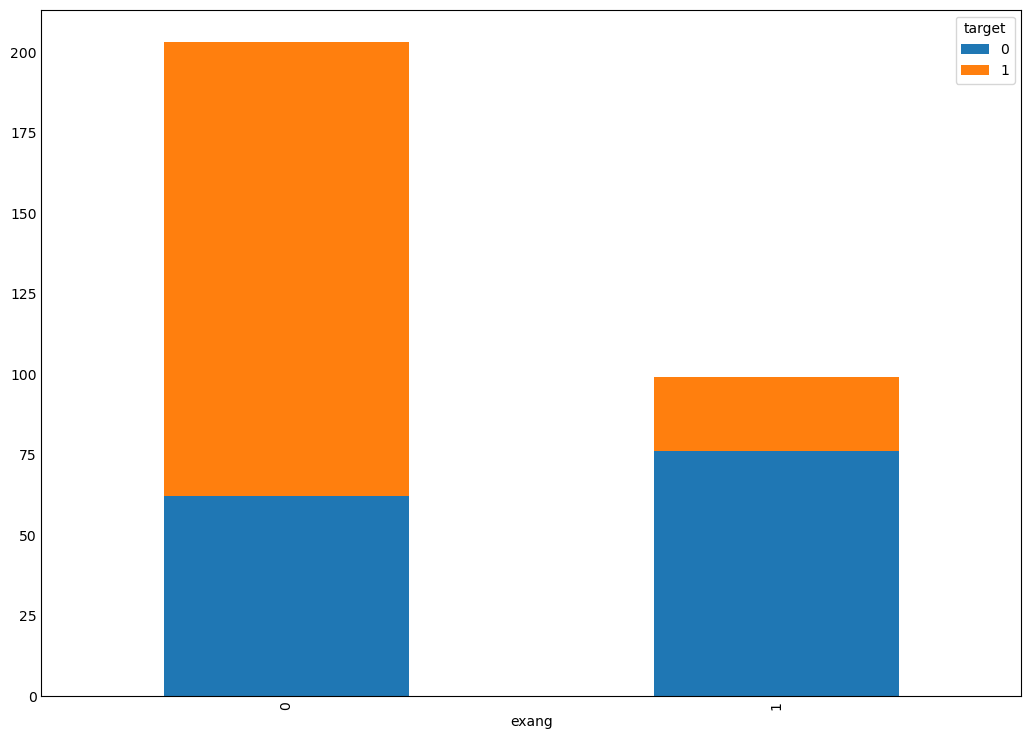

In [89]:
target_exang.plot(kind="bar",stacked=True,figsize=(10,7))

##### observations:
   - no excercises ➡ more disease
   - excercises ➡ less disease

## 8. Check if thalassemia is a major cause of CVD

In [94]:
data.corr().target


age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

<AxesSubplot:>

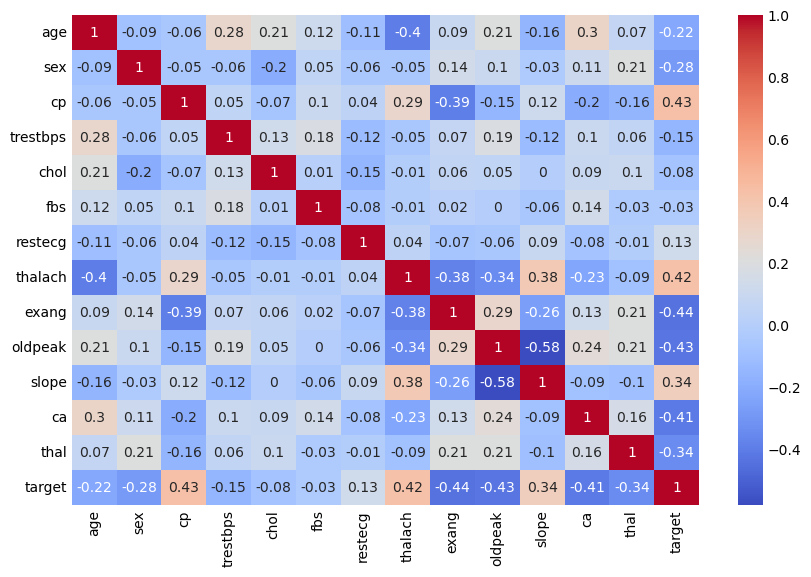

In [97]:
target_thal=data.groupby(['thal','target']).size().unstack()

<AxesSubplot:xlabel='thal'>

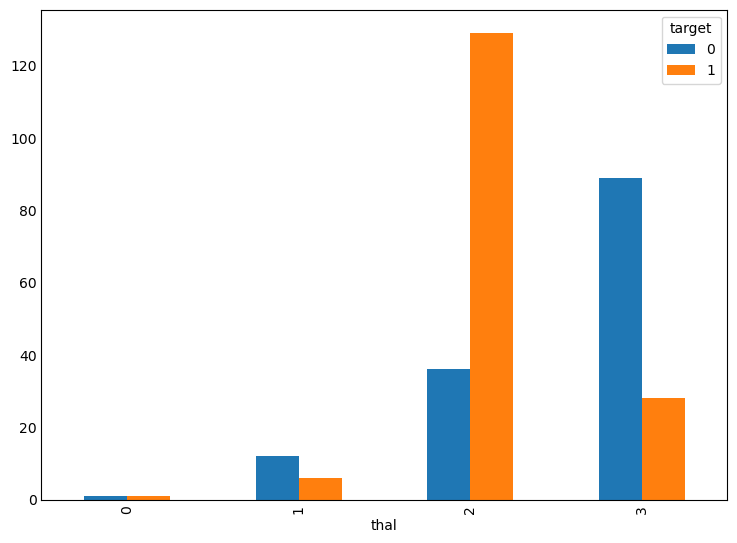

In [99]:
target_thal.plot(kind="bar",stacked=False,figsize=(7,5))

3 = normal; 6 = fixed defect; 7 = reversible defect

In [100]:
data['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

##### observations:
 - CVD occure more in fixed defect type of thalassemia.


## 9. List how the other factors determine the occurrence of CVD

<AxesSubplot:>

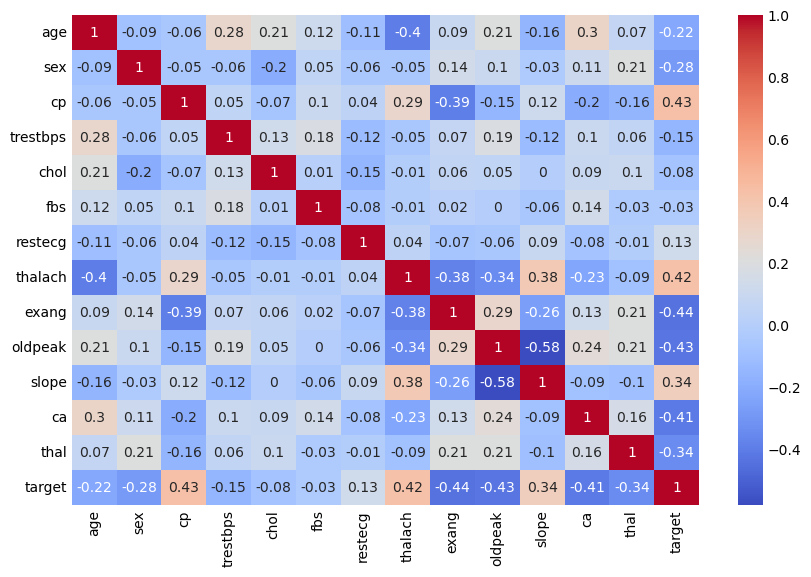

In [103]:
corr = data.corr().round(2)
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

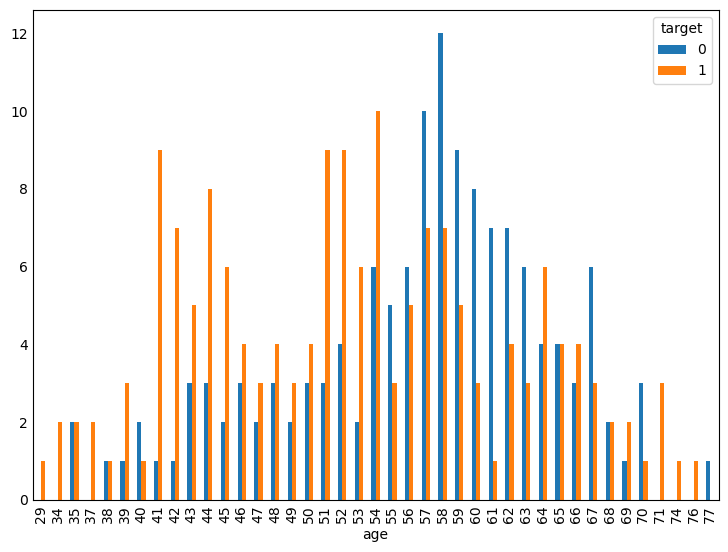

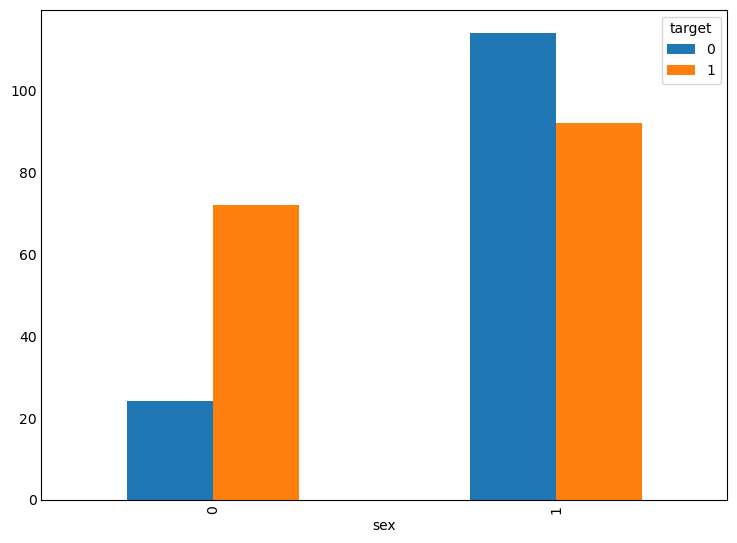

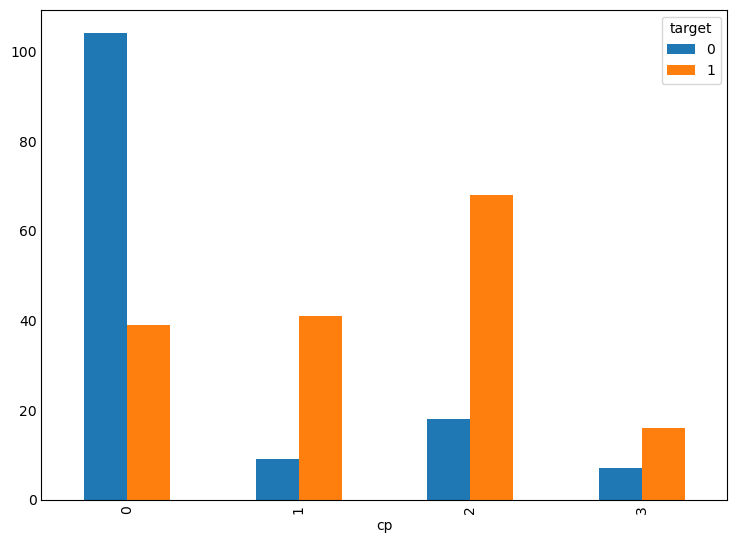

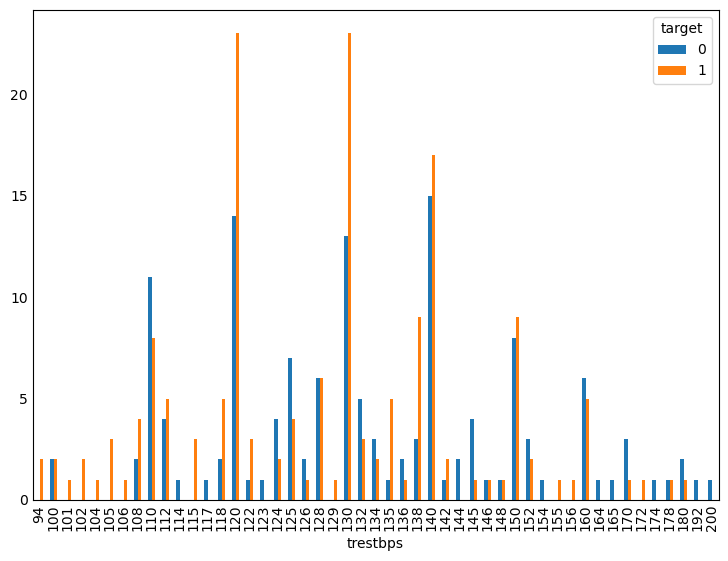

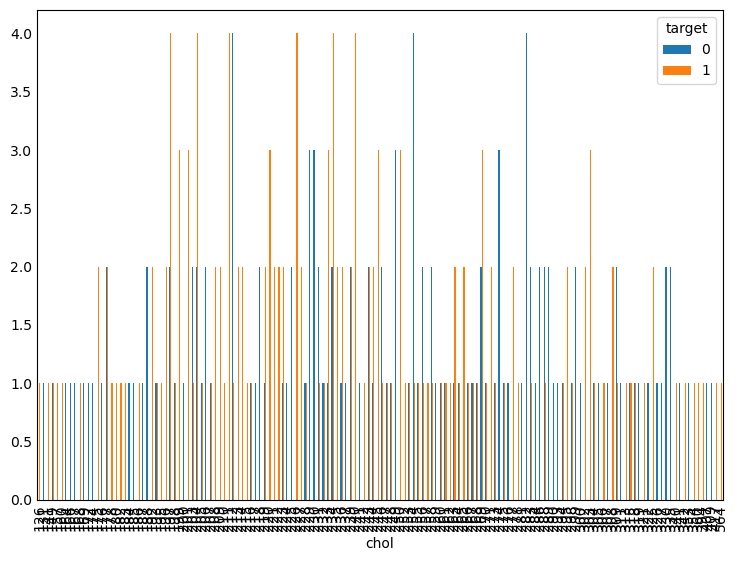

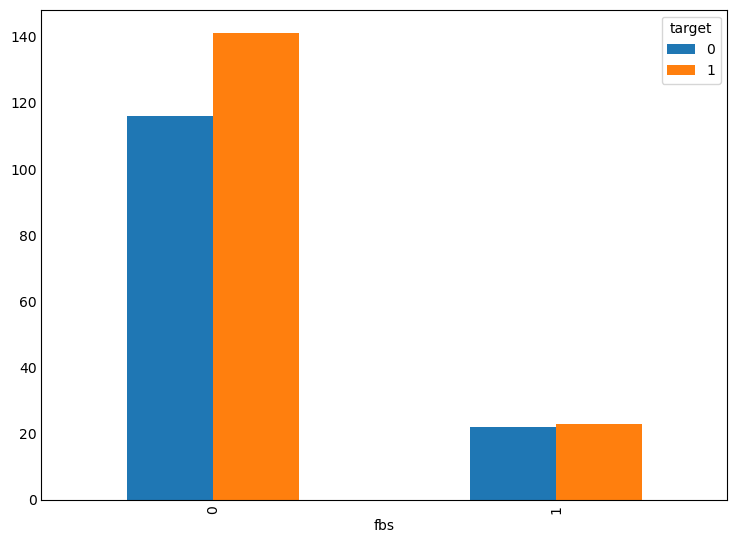

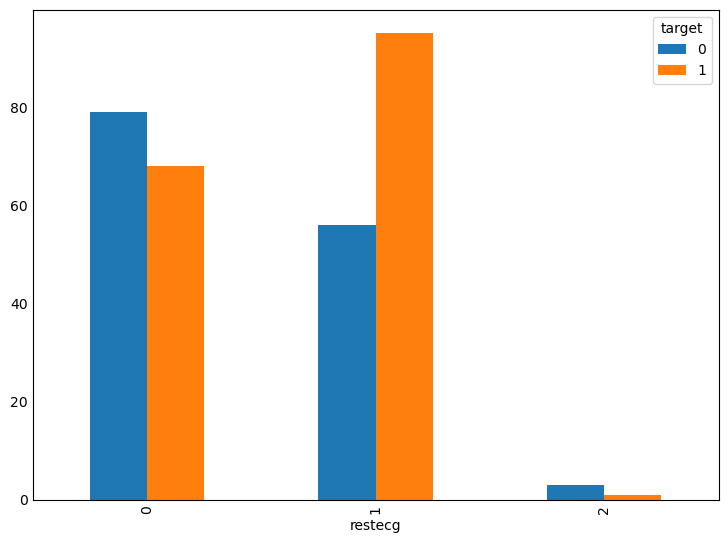

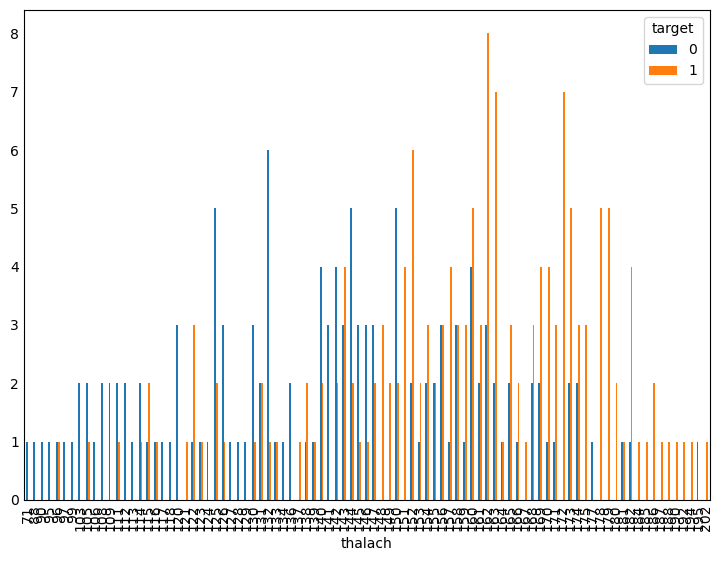

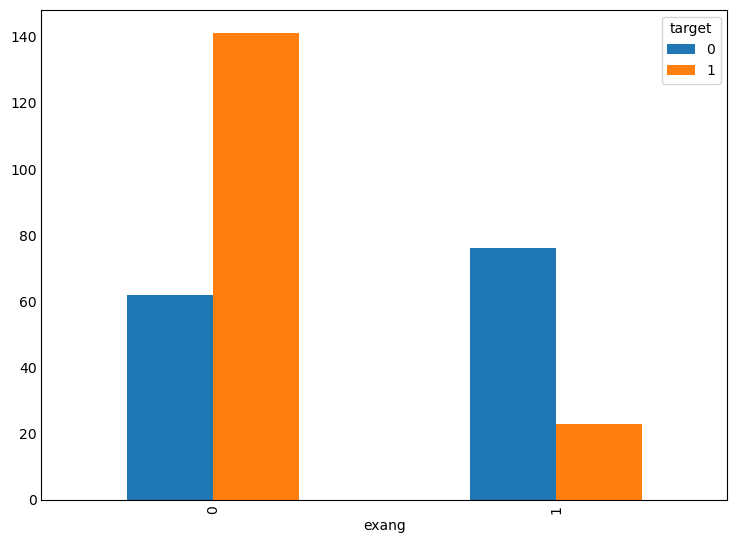

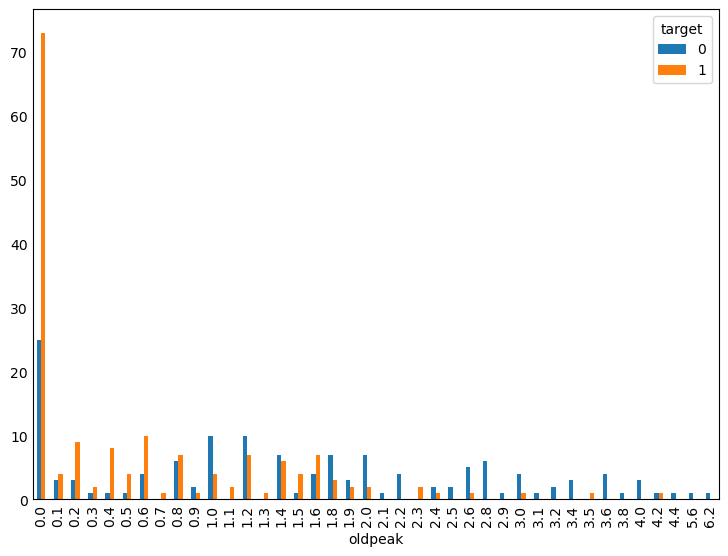

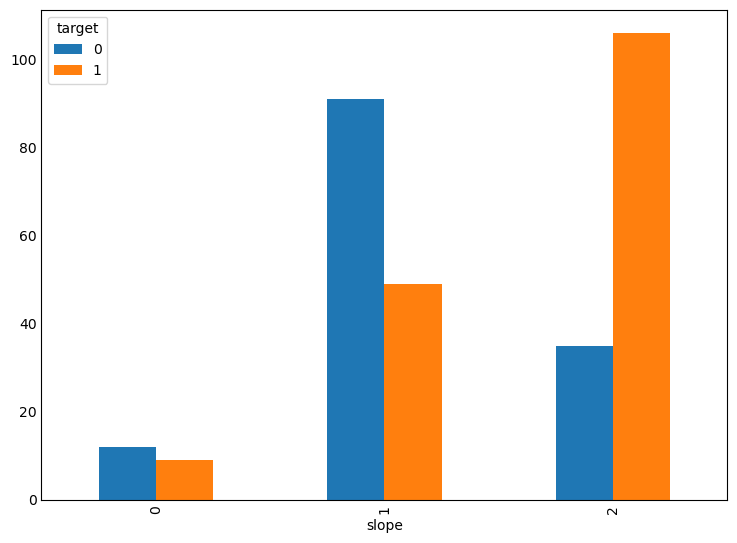

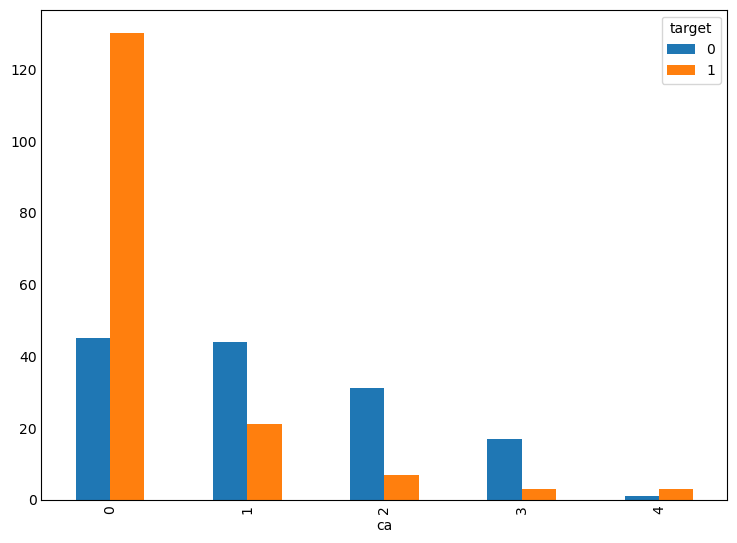

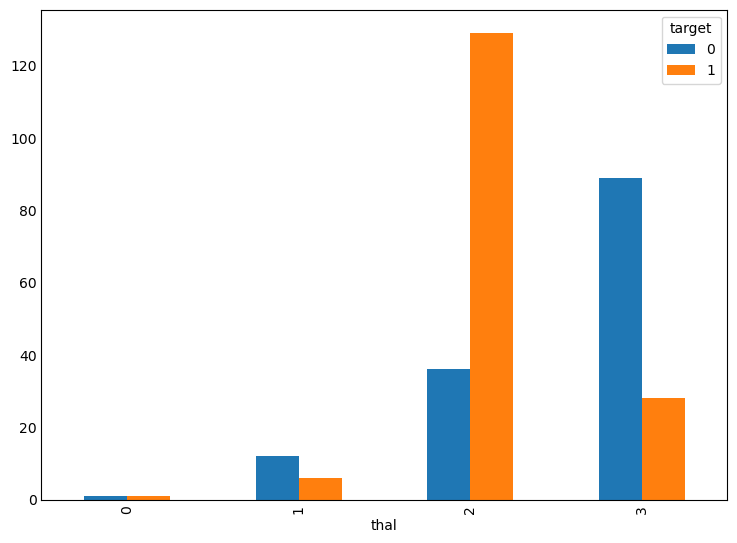

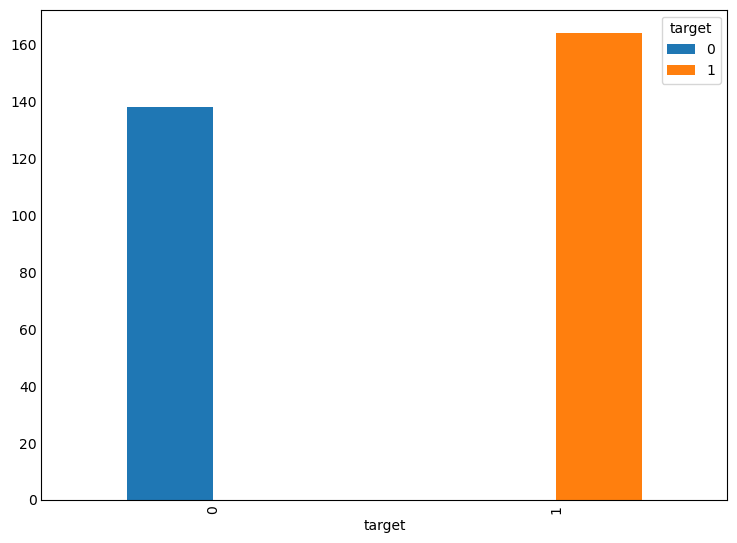

In [104]:
for col in data:
    new=data.groupby([col,'target']).size().unstack()
    new.plot(kind="bar",stacked=False,figsize=(7,5))

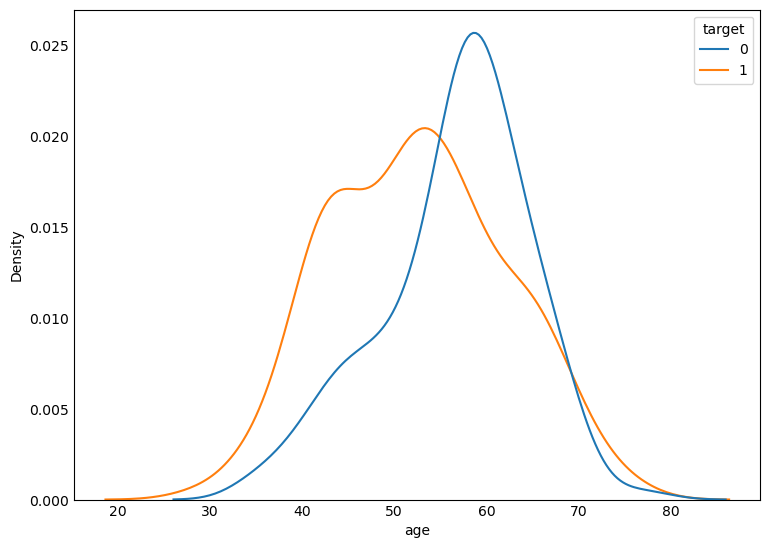

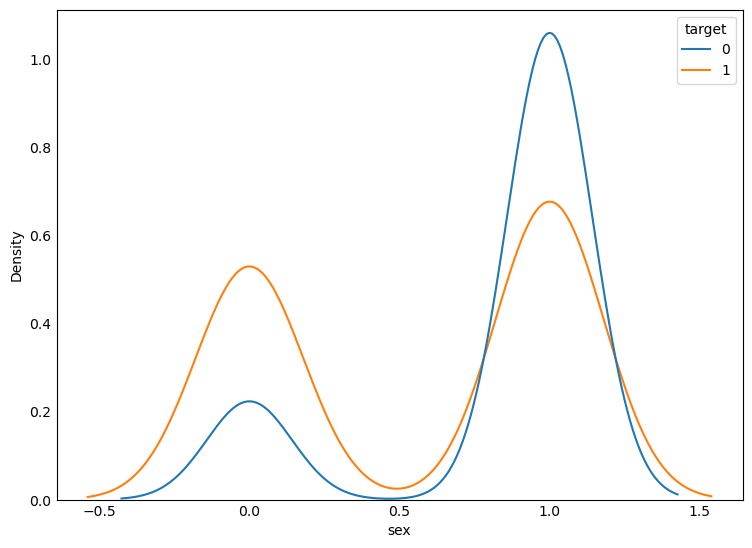

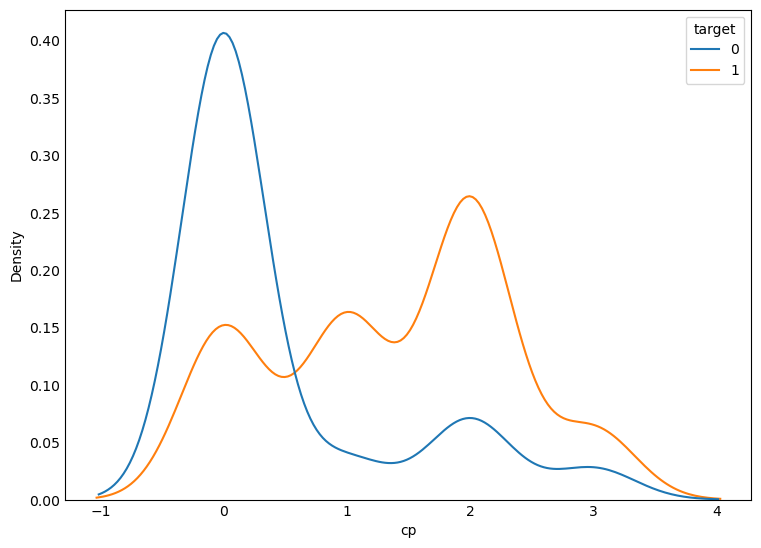

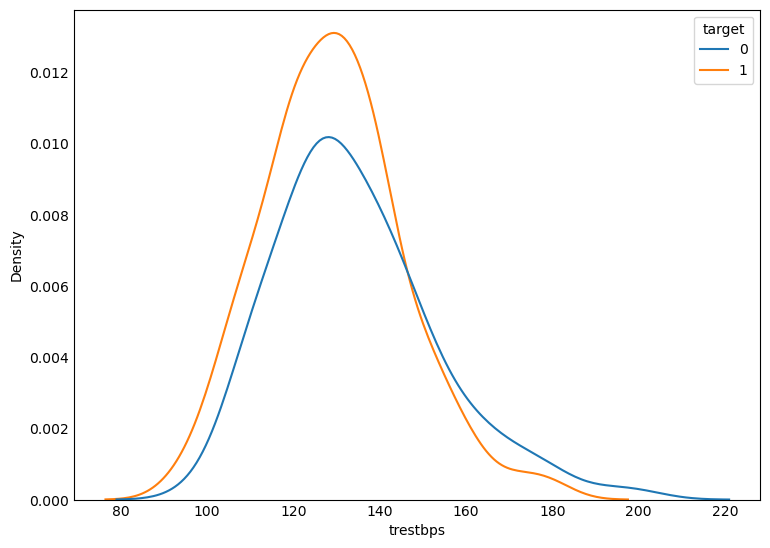

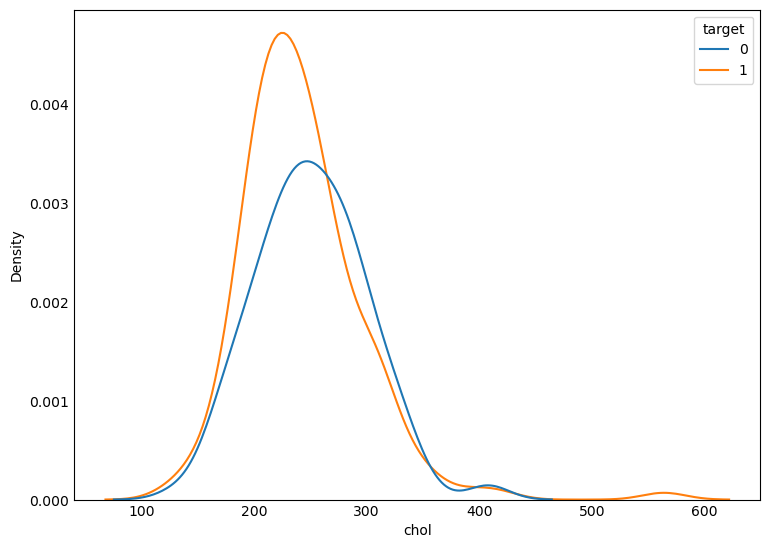

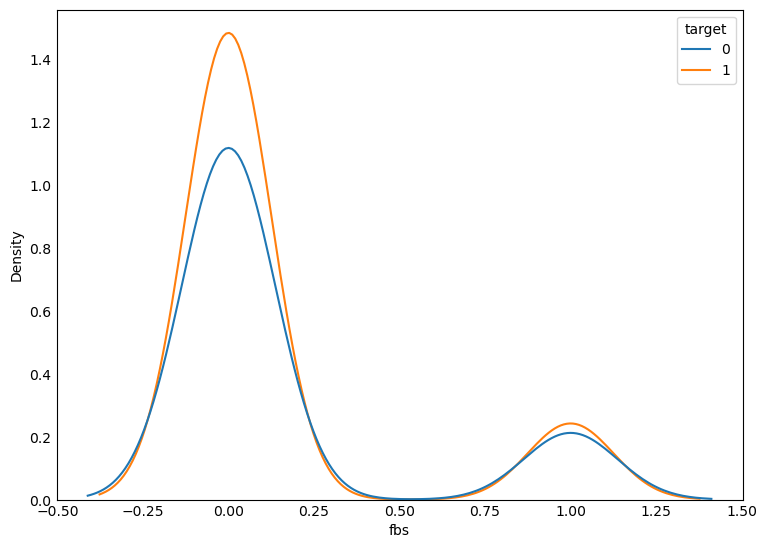

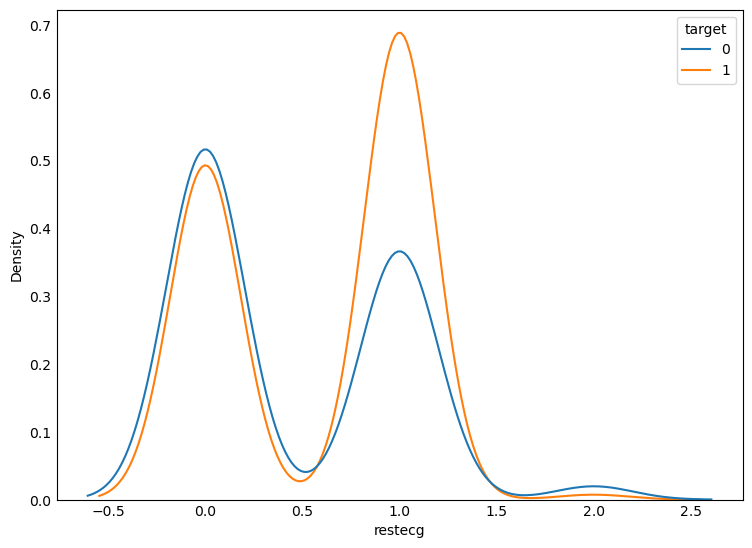

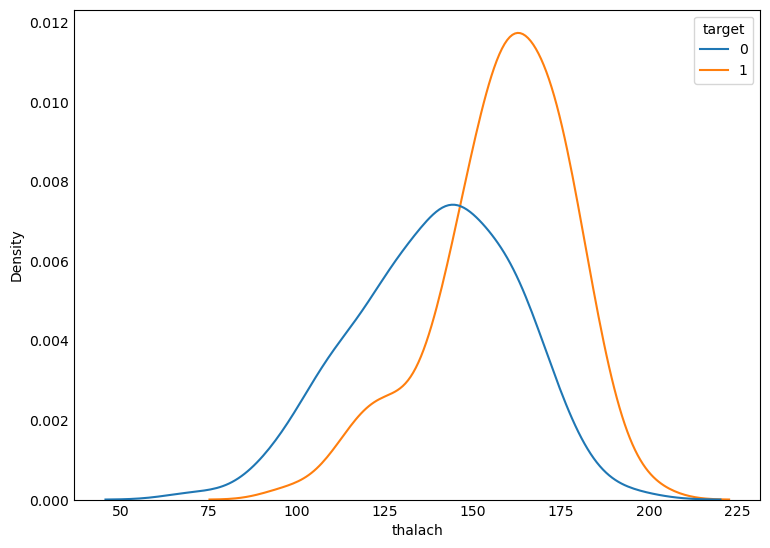

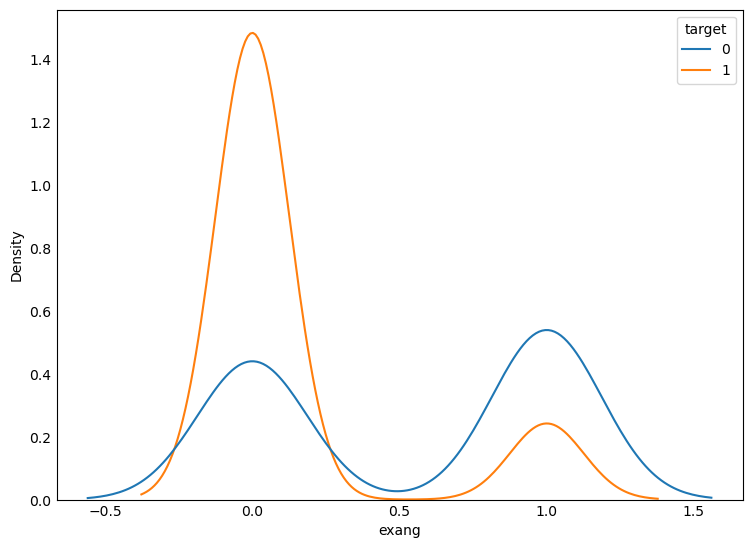

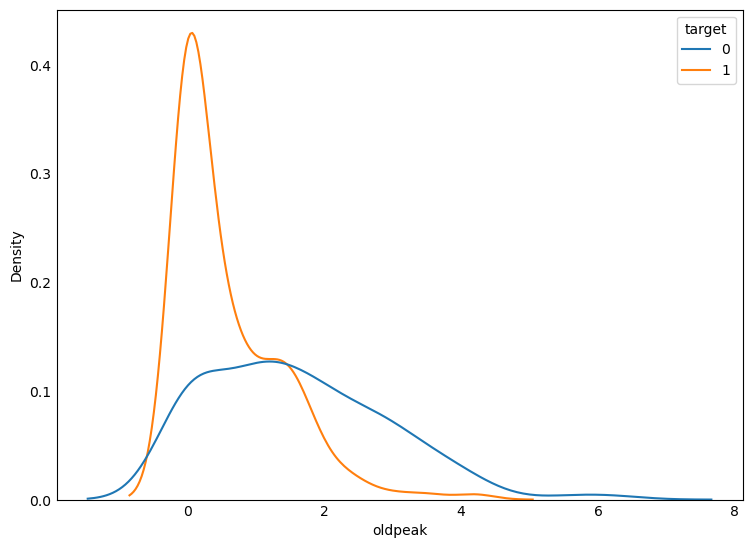

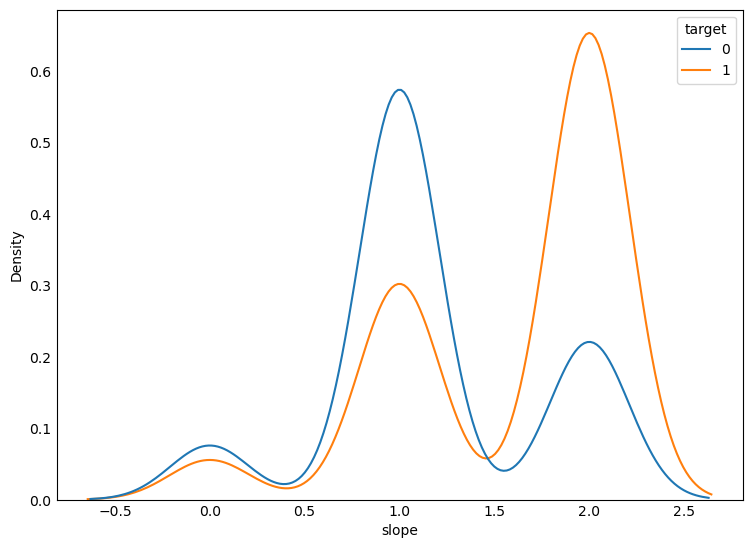

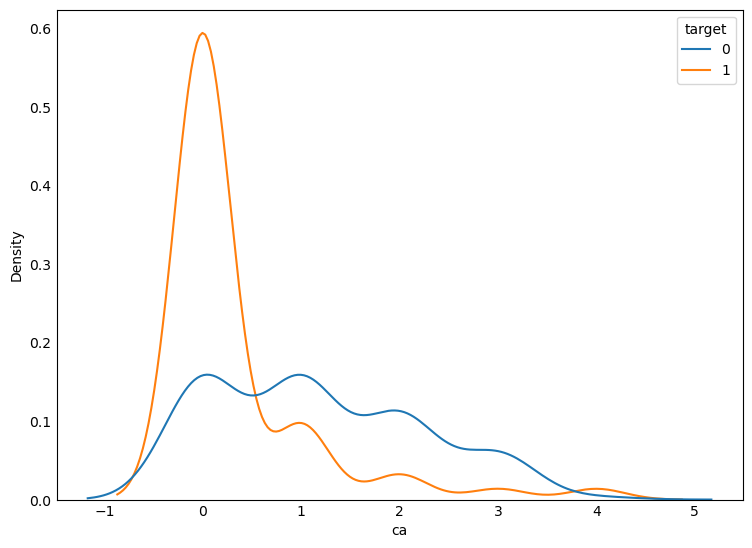

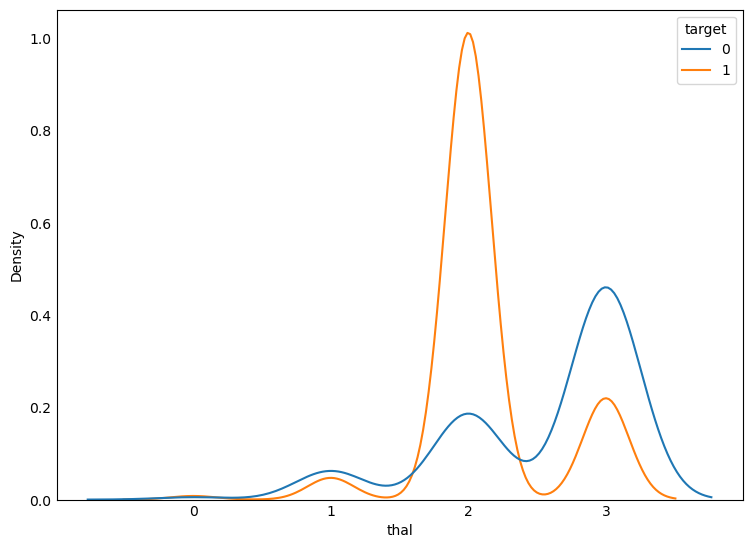

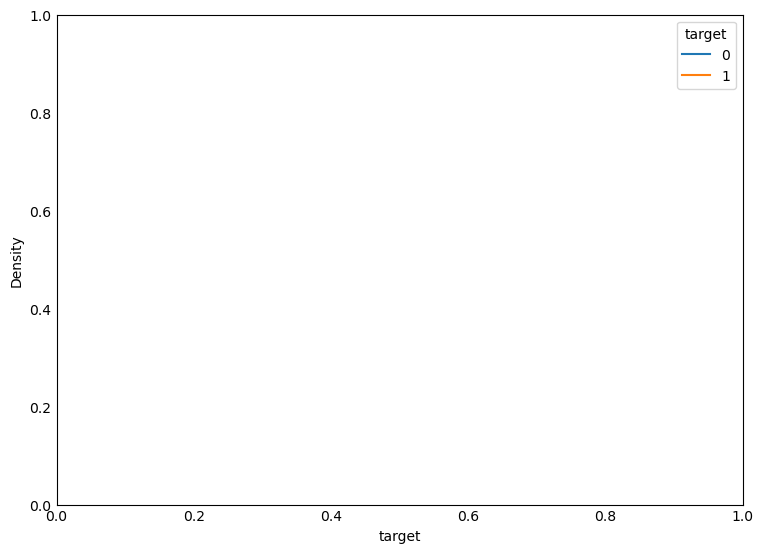

In [105]:
for col in data:
    plt.figure(figsize = (7,5))
    sns.kdeplot(data=data, x=col, hue="target")

##### observations:
 - cp ➡ CVD occure more in range 1.5-4
 - thalach ➡ CVD occure more in range 150-210
 - oldpeak ➡ CVD occure more in range 0.5-1.5
 - slope ➡ CVD occure more in range 1.5-2.5
 - ca ➡ CVD occure more in range -0.5 - 0.5

## 10. Use a pair plot to understand the relationship between all the given variables

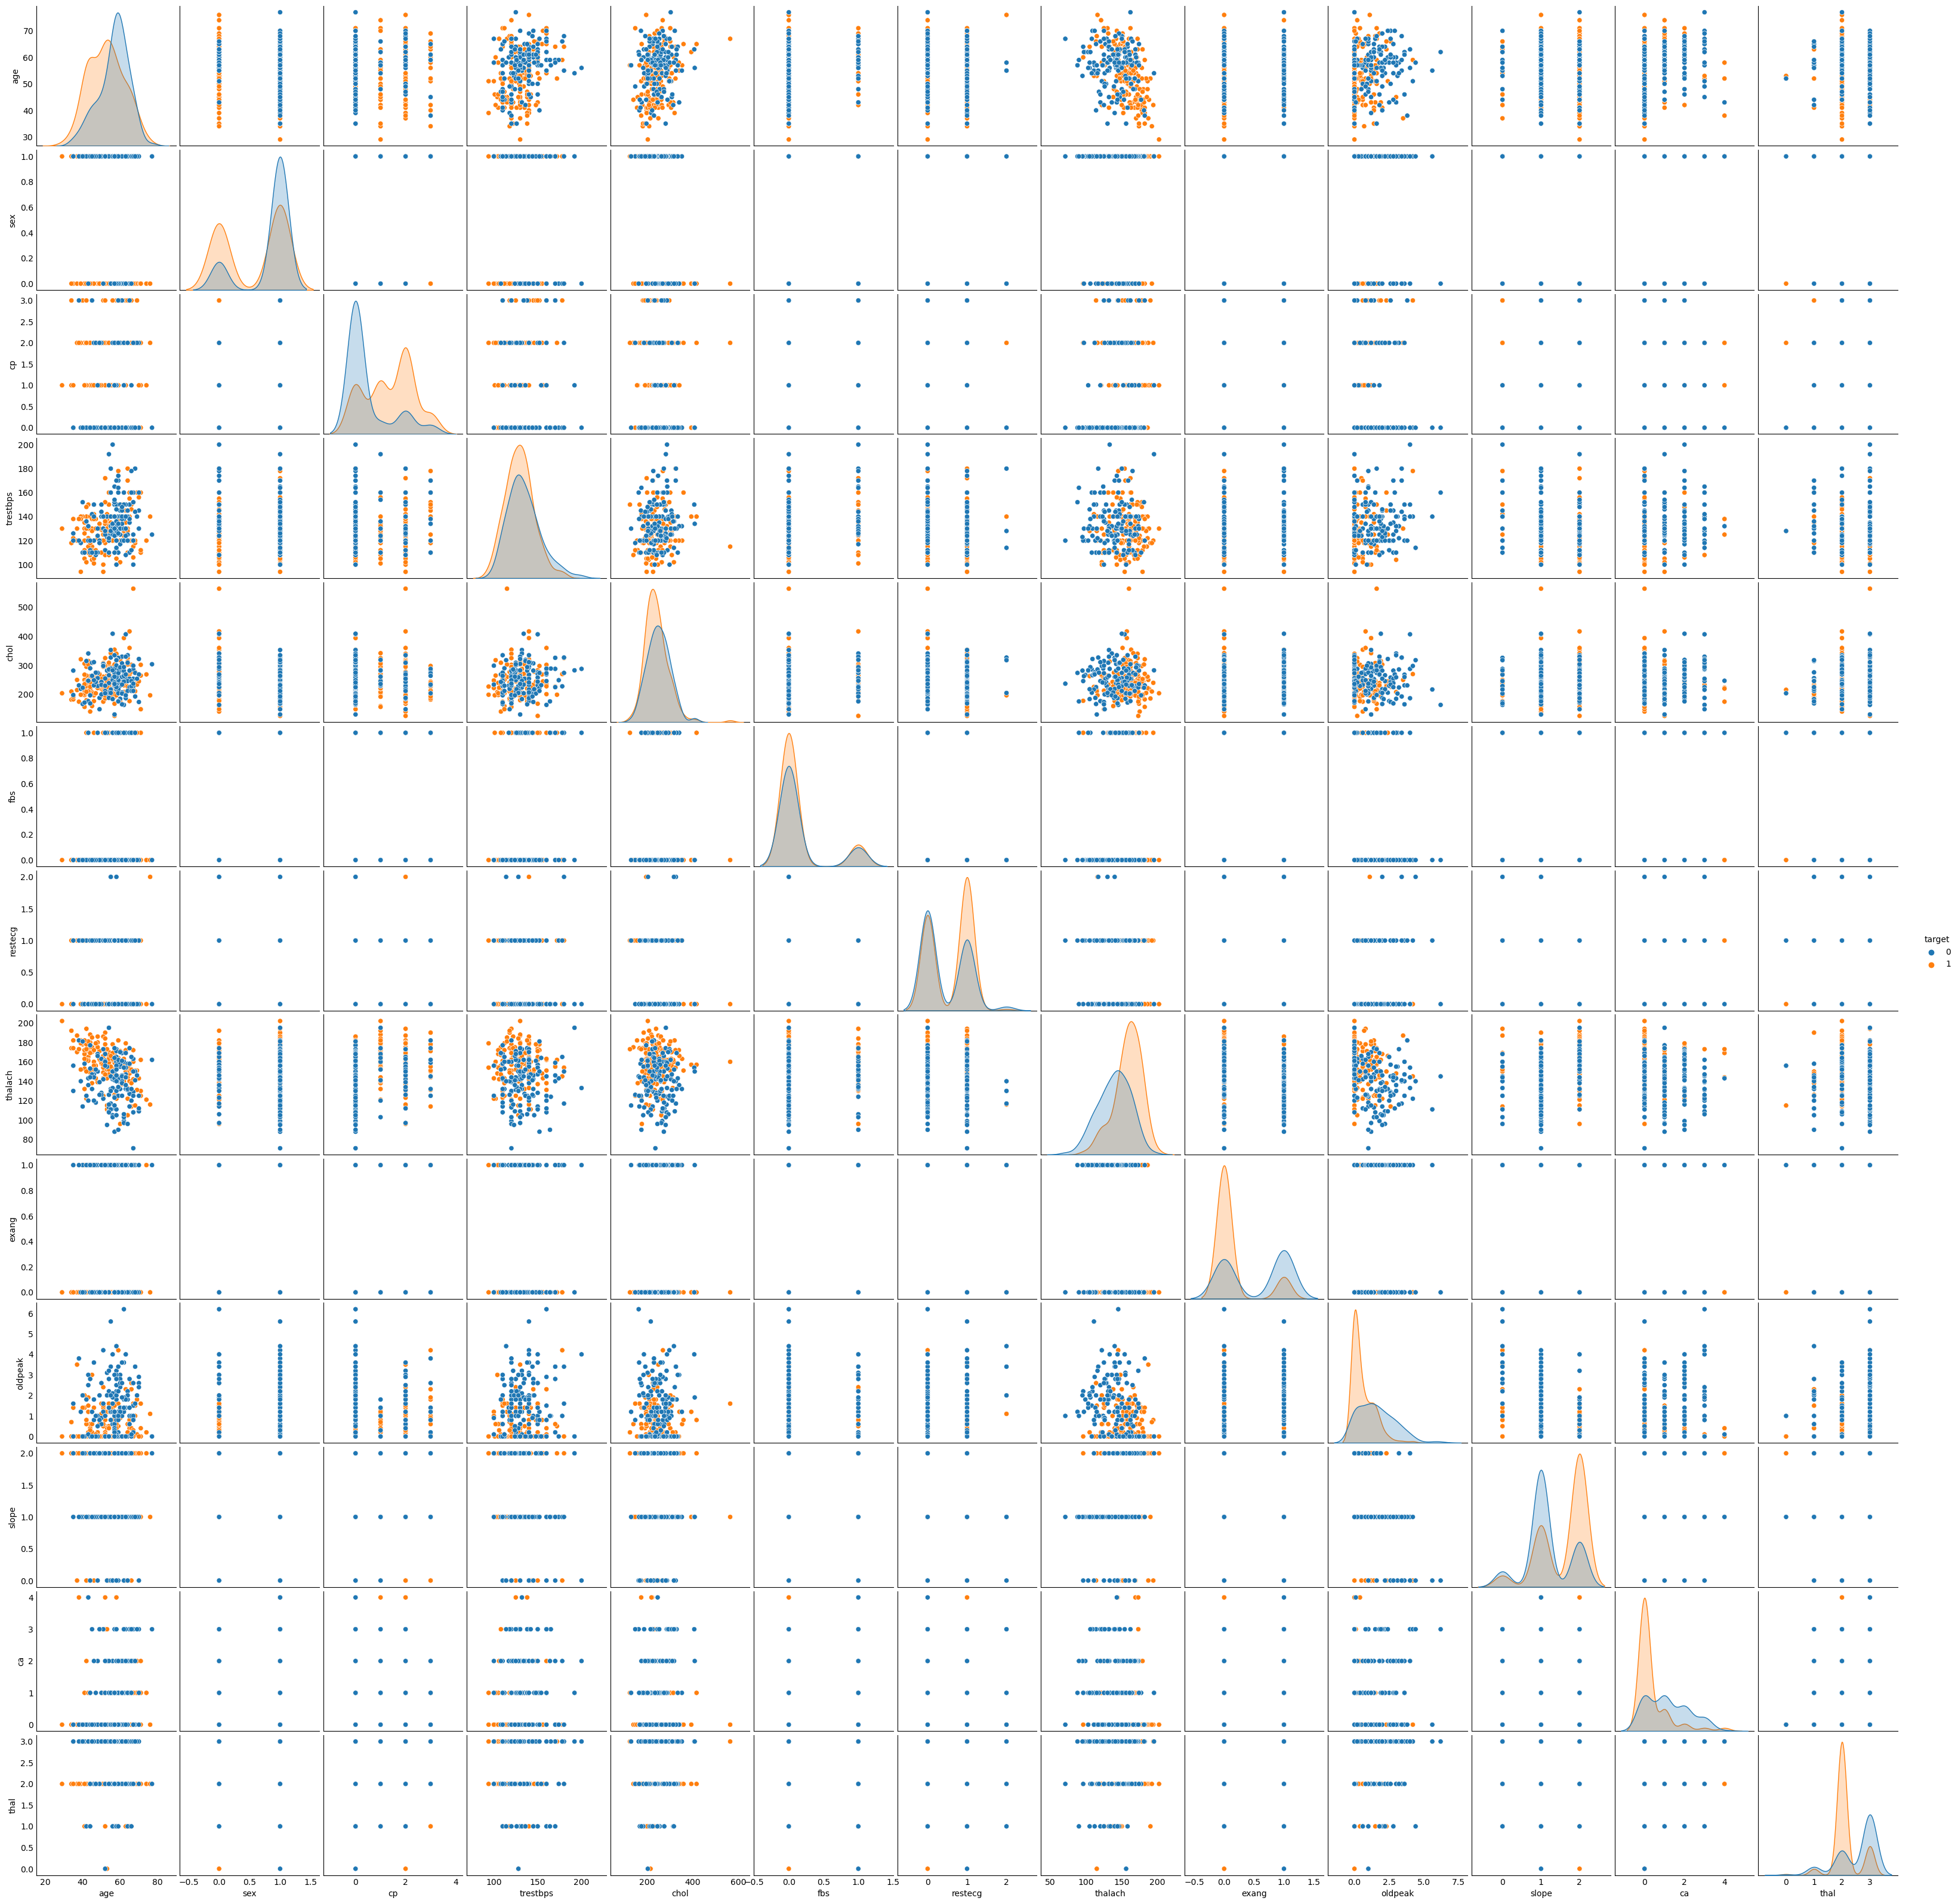

In [111]:
sns.pairplot(data=data,hue='target')

# Summary analysis:
 - age➡CVD occure more in range 40-60
 - sex➡CVD occure more in females
 - trestbps➡CVD occure more in range 120-140
 - chol➡ CVD occure more in range 180-280
 - exceg➡ CVD occure more in category no escercise
 - thal➡ CVD occure more in category fixed defect
 - cp ➡ CVD occure more in range 1.5-4
 - thalach ➡ CVD occure more in range 150-210
 - oldpeak ➡ CVD occure more in range 0.5-1.5
 - slope ➡ CVD occure more in range 1.5-2.5
 - ca ➡ CVD occure more in range -0.5 - 0.5

# 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data_train, data_test = train_test_split(data, train_size = 0.7, random_state=100)

In [6]:
data_train.shape, data_test.shape

((211, 14), (91, 14))

In [7]:
y_train = data_train.pop('target')
x_train = data_train

In [8]:
y_test = data_test.pop('target')
x_test = data_test

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [10]:
lg_predictions = lg.predict(x_test)

In [11]:
from sklearn import metrics

In [12]:
metrics.accuracy_score(y_test, lg_predictions)

0.8571428571428571

In [13]:
print(classification_report(y_test, lg_predictions))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        48
           1       0.80      0.93      0.86        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91



In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
dt_predictions = dtree.predict(x_test)

In [17]:
metrics.accuracy_score(y_test, dt_predictions)

0.7472527472527473

In [19]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73        48
           1       0.69      0.86      0.76        43

    accuracy                           0.75        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.77      0.75      0.75        91

